<a href="https://colab.research.google.com/github/graceetzel/Numerical-Analysis/blob/main/Cooling_temps_Part_1_and_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1

System of equations:

$t_1 = \frac 1 4 (20 + 100 + t_2 + t_4)$
$$4t_1 - t_2-t_4= T_l + T_t$$

$t_2 = \frac 1 4 (100 + t_1 + t_3 + t_5)$
$$4t_2 - t_1-t_3-t_5 = T_t$$

$t_3 = \frac 1 4 (100 + 80 + t_2 + t_6)$
$$4t_3 - t_2-t_6= T_t + T_r$$

$t_4 = \frac 1 4 (20 + t_1 + t_5 + t_7)$
$$4t_4 - t_1-t_5-t_7 = T_l$$

$t_5 = \frac 1 4 (t_4 + t_2 + t_6 + t_8)$
$$4t_5 - t_2-t_4-t_6-t_8 = 0$$

$t_6 = \frac 1 4 (80 + t_3 + t_5 + t_9)$
$$4t_6 - t_3-t_5-t_9 = T_r$$

$t_7 = \frac 1 4 (20 + 0 + t_4 + t_8)$
$$4t_7 - t_4-t_8= T_l + T_b$$

$t_8 = \frac 1 4 (0 + t_7 + t_9 + t_5)$
$$4t_8 - t_5-t_7-t_9 = T_b$$

$t_9 = \frac 1 4 (80 + 0 + t_8 + t_6)$
$$4t_9 - t_6-t_8= T_r + T_b$$

[120. 100. 180.  20.   0.  80.  20.   0.  80.]
3x3 temperature grid:


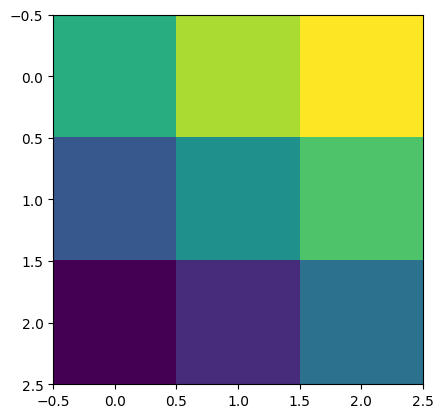

[57.14285714 71.42857143 78.57142857 37.14285714 50.         62.85714286
 21.42857143 28.57142857 42.85714286]

5x5 temperature grid:


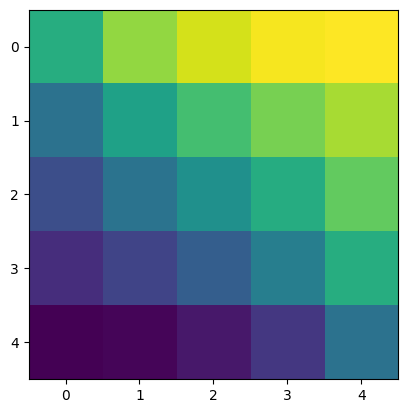

[58.74747475 73.57575758 80.4040404  84.         84.98989899 41.41414141
 55.15151515 64.04040404 70.60606061 75.95959596 31.75757576 41.57575758
 50.         58.42424242 68.24242424 24.04040404 29.39393939 35.95959596
 44.84848485 58.58585859 15.01010101 16.         19.5959596  26.42424242
 41.25252525]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#We utilize the repeating block structure to format our grid.
#We create the nxn blocks and then create the overall structure
#Block one is along the diagonal, block 2 adjacent, and all others are block 3
def gen_temp_matrix(n):
  block1 = np.eye(n) * 4
  block1[1:, :-1] += np.eye(n-1) * -1
  block1[:-1, 1:] += np.eye(n-1) * -1
  block2 = np.eye(n) * -1
  block3 = np.zeros((n,n))

  rows = []
  for i in range(n):
    row = []
    for j in range(n):
      if j == i:
        row.append(block1)
      elif (j-i == 1) or (i-j == 1):
        row.append(block2)
      else:
        row.append(block3)
    row = np.concatenate(row,0)
    rows.append(row)
  rows = np.concatenate(rows,1)

  return rows

#the first n gridpoints are adjacent to the top
#the last n are adjacent to the bottom
#every n elements starting with the first are adjacent to the left
#every n elements starting at the nth are adjacent to the right
#we add those temperatures to the corresponding elements of b
def gen_b(n, top, bottom, left, right):
  b = np.zeros((n*n))

  b[:n] += top
  b[-n:] += bottom
  b[::n] += left
  b[n-1::n] += right

  return b

def solve_grid (n, top, bottom, left, right):
  A = gen_temp_matrix(n)
  b = gen_b(n, top, bottom, left, right)
  x = np.linalg.solve(A,b)

  X = x.reshape((n,n))
  plt.imshow(X)
  plt.show()

  return x

b = gen_b(3,100,0,20,80)
print(b)

print("3x3 temperature grid:")
x = solve_grid(3, 100, 0, 20, 80)
print(x)

print("\n5x5 temperature grid:")
x = solve_grid(5, 100, 0, 20, 80)
print(x)



How to call the solver function **grid_solve(n, top, bottom, left, right):**

The arguments are $n$ (the dimension of the $n \times n$ grid), the top temperature, the bottom temperature, the left temperature, and the right temperature. The function plots a heatmap and returns a numpy array $x$ whose elements represent the temperature at their indices gridpoints.

30x30 temperature grid:


/tmp/ipython-input-704953976.py:6: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  x = spsolve(A,b)


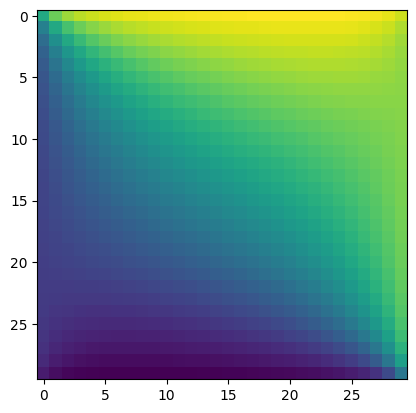

[59.95439569 75.72139978 83.11361356 87.14181994 89.60956374 91.257253
 92.42864539 93.30121341 93.97489747 94.51001497 94.9450153  95.30547694
 95.6089743  95.86785213 96.09087062 96.28420321 96.45203862 96.59691894
 96.71987679 96.82038601 96.89609263 96.94222437 96.95045056 96.90669144
 96.78672572 96.54675145 96.10123078 95.26532834 93.58831765 89.81758278
 44.096183   59.81758987 69.59123451 75.84410245 80.03918203 82.99080288
 85.15611514 86.80131079 88.08836151 89.12014712 89.96456928 90.66791817
 91.26256813 91.7715636  92.21142713 92.59390359 92.92703234 93.21576036
 93.46220219 93.66557462 93.82176015 93.92235428 93.95288643 93.8895895
 93.69345997 93.29904931 92.59284332 91.37176495 89.27035948 85.68201345
 36.61274642 49.8615422  59.58963216 66.60417331 71.71225903 75.51066135
 78.40370151 80.65955308 82.45709068 83.91764269 85.12519654 86.13905833
 87.00181644 87.74440703 88.3893707  88.95295169 89.44642678 89.87688797
 90.24759699 90.55795014 90.80301905 90.97254618 91.04

In [ ]:
from scipy.sparse.linalg import spsolve

def sparse_grid(n, top, bottom, left, right):
  A = gen_temp_matrix(n)
  b = gen_b(n, top, bottom, left, right)
  x = spsolve(A,b)

  X = x.reshape((n,n))
  plt.imshow(X)
  plt.show()

  return x

print("30x30 temperature grid:")
x_30 = sparse_grid(30,100, 0, 20, 80)
print(x_30)


50x50 temperature grid:


/tmp/ipython-input-704953976.py:6: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  x = spsolve(A,b)


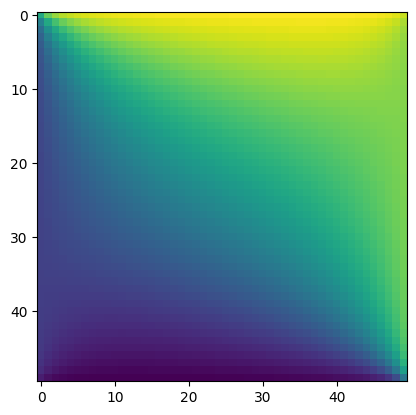

[59.98316422 75.77859988 83.19857808 ... 16.80142192 24.22140012
 40.01683578]


In [ ]:
print("\n50x50 temperature grid:")
x_50 = sparse_grid(50,100, 0, 20, 80)
print(x_50)

We will now test by varing the temperatures on the sides. Constant heatmaps still apply a differentiation factor but we verified that the temperatures were correct (ex. when all sides are 100 the interior temperatures were also 100, but any numerical differences were amplified by pyplot's heatmap function, creating noise)

# Part 2

Section 1:

Here is the code of the LU factorization provided by Owen.

In [ ]:
import numpy as np

def lu_factorization(A):
  n = A.shape[0]
  L = np.eye(n) # Identity for L diagonal
  U = A.copy()

  for j in range(n - 1):
    if abs(U[j, j]) < 1e-15:
      raise ValueError('Zero pivot encountered')
    for i in range(j + 1, n):
      mult = U[i, j] / U[j, j]
      L[i, j] = mult
      for k in range(j, n):
        U[i, k] -= mult * U[j, k]

  return L, U

def lu_solve(L, U, b):
  n = len(b)
  # Forward sub: Ly = b
  y = np.zeros(n)

  for i in range(n):
    sum_ly = sum(L[i, j] * y[j] for j in range(i))
    y[i] = (b[i] - sum_ly) / L[i, i]

  # Back sub: Ux = y
  x = np.zeros(n)
  for i in range(n - 1, -1, -1):
    sum_ux = sum(U[i, j] * x[j] for j in range(i + 1, n))
    x[i] = (y[i] - sum_ux) / U[i, i]

  return x


Next, we create the boundary temperatures and solve the system using the LU factorization, and LU solve.

0 0 0 0


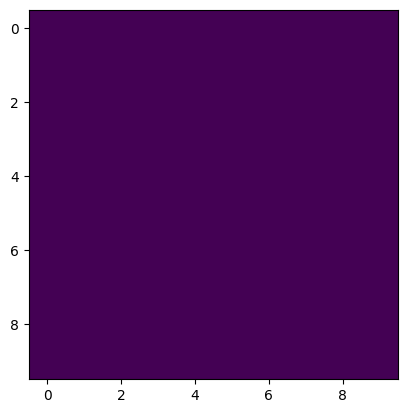

0 0 0 30


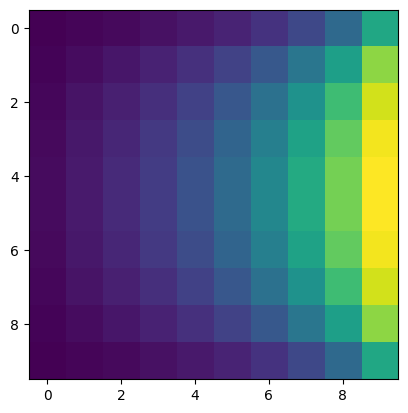

0 0 0 60


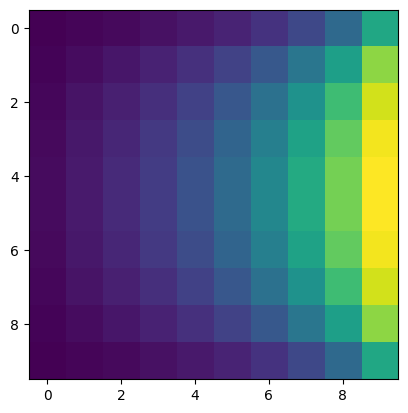

0 0 0 100


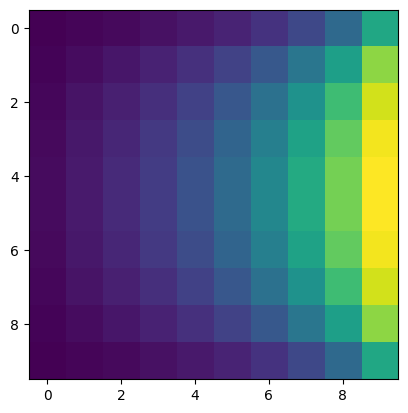

0 0 30 0


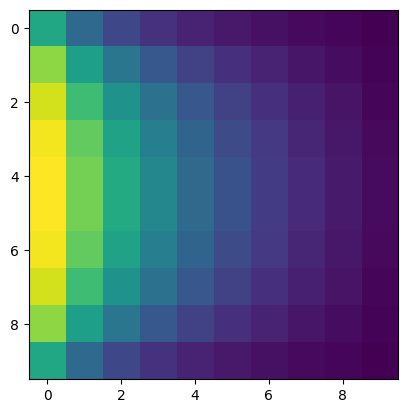

0 0 30 30


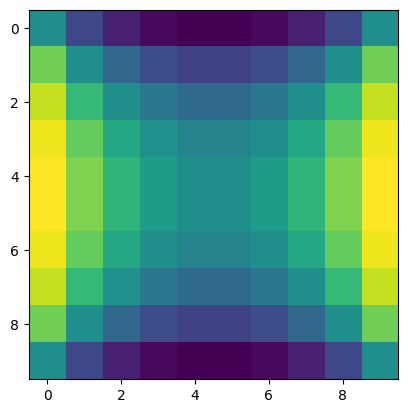

0 0 30 60


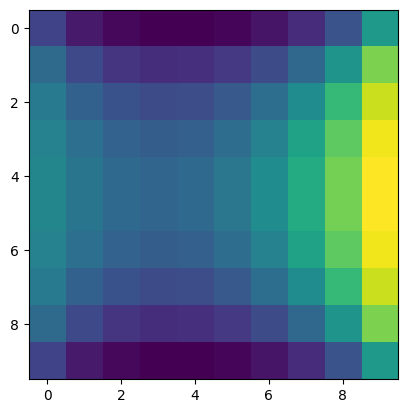

0 0 30 100


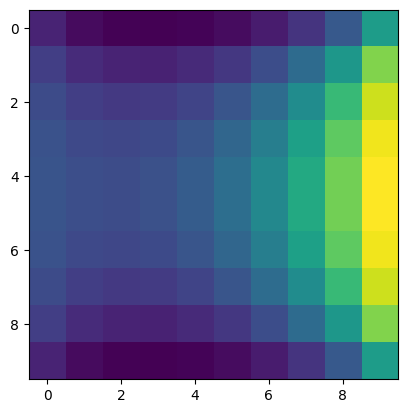

0 0 60 0


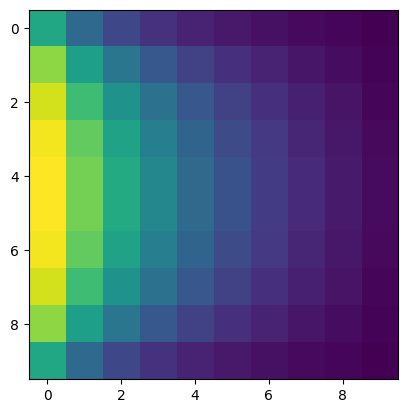

0 0 60 30


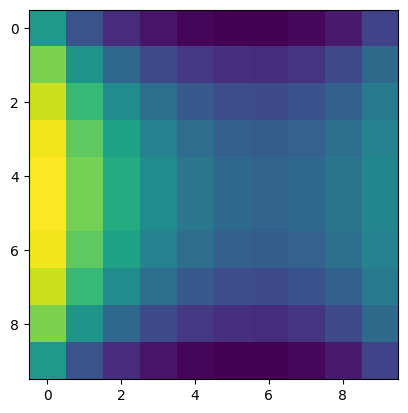

0 0 60 60


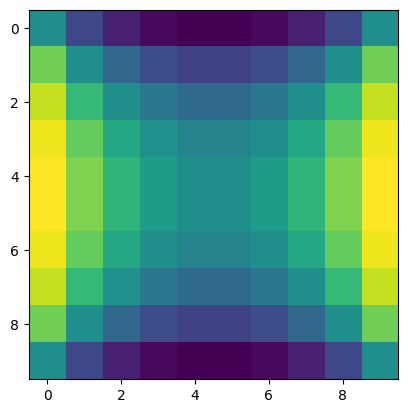

0 0 60 100


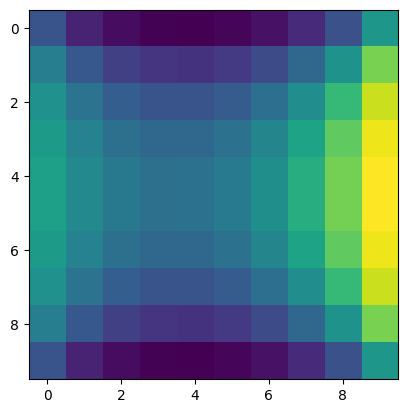

0 0 100 0


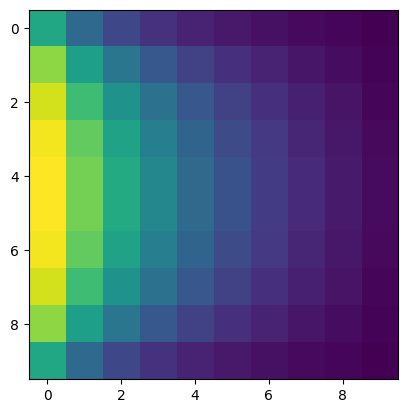

0 0 100 30


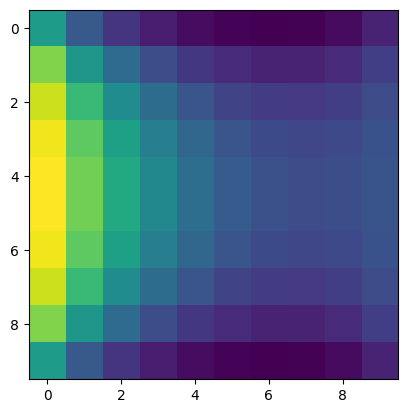

0 0 100 60


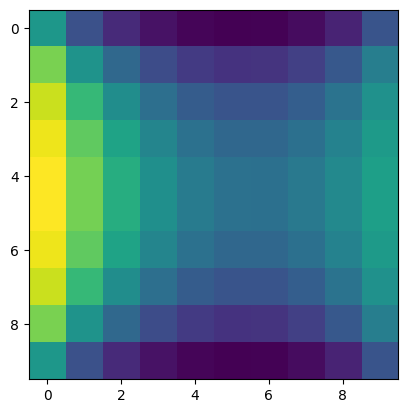

0 0 100 100


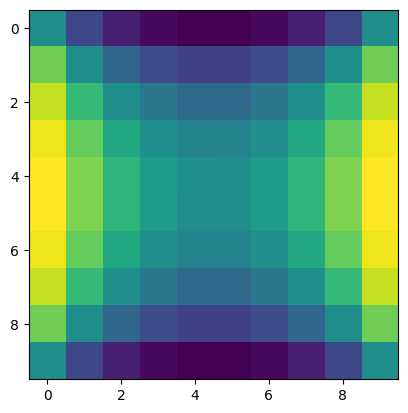

0 30 0 0


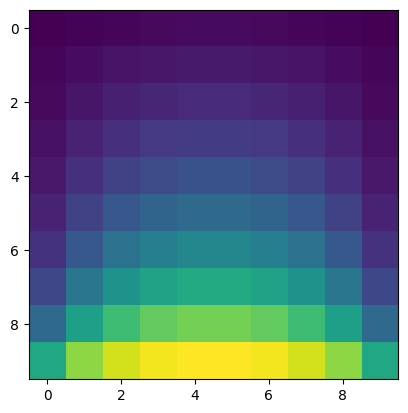

0 30 0 30


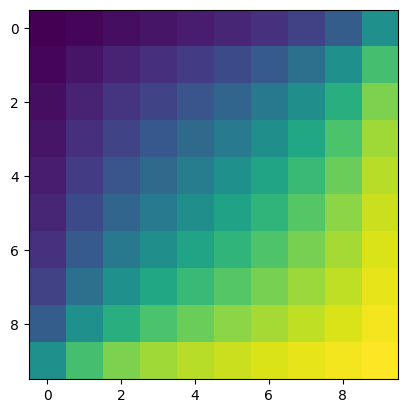

0 30 0 60


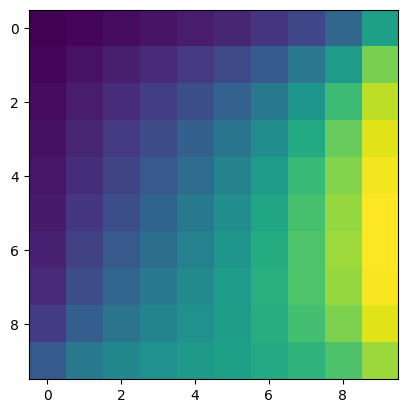

0 30 0 100


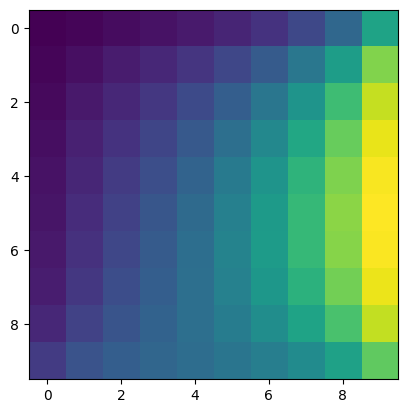

0 30 30 0


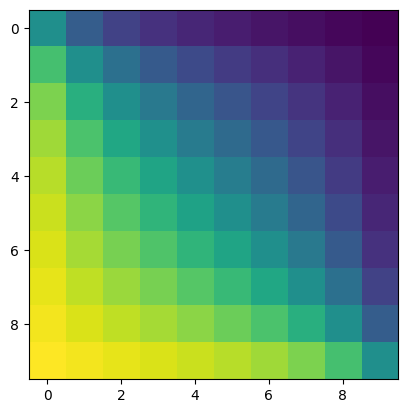

0 30 30 30


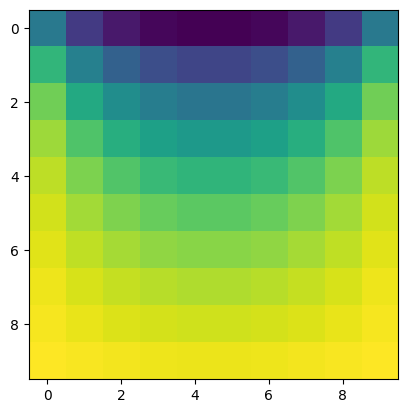

0 30 30 60


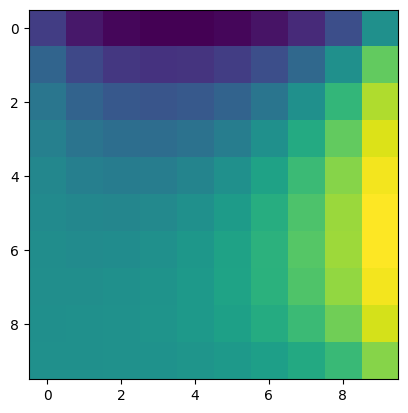

0 30 30 100


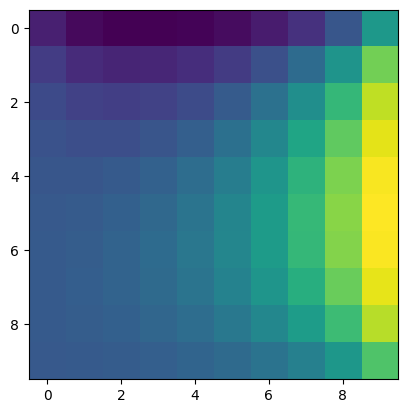

0 30 60 0


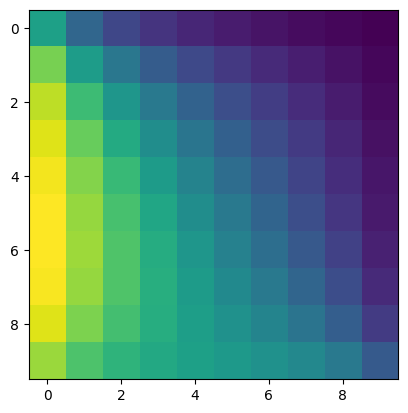

0 30 60 30


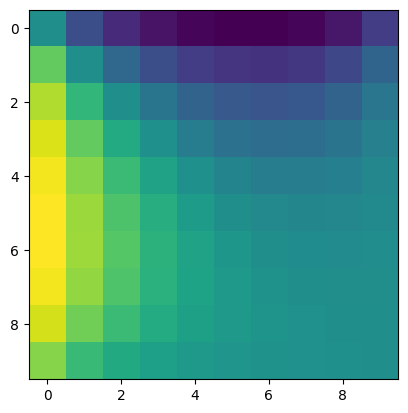

0 30 60 60


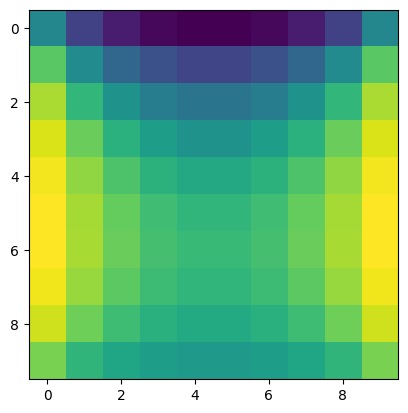

0 30 60 100


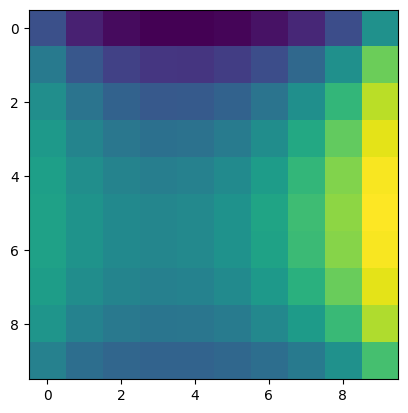

0 30 100 0


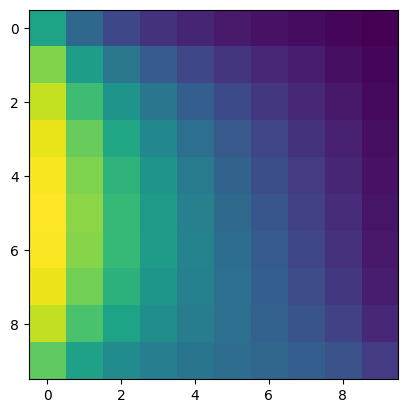

0 30 100 30


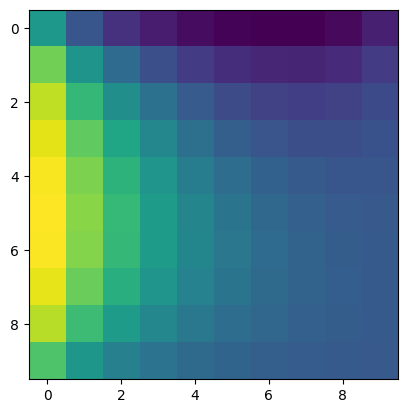

0 30 100 60


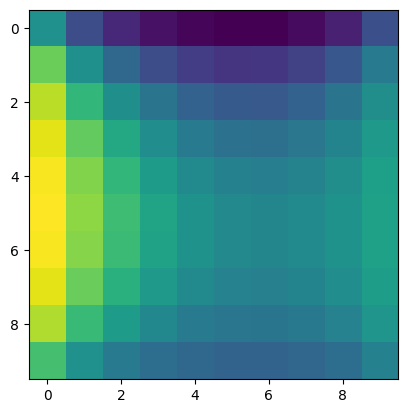

0 30 100 100


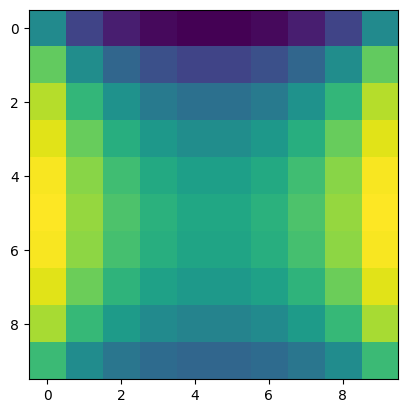

0 60 0 0


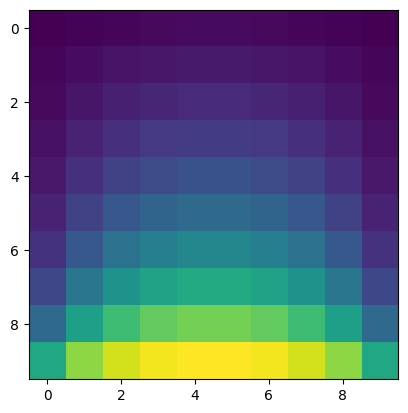

0 60 0 30


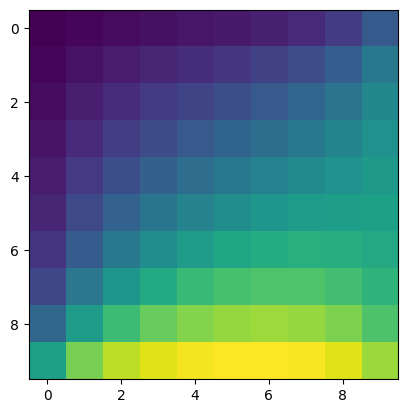

0 60 0 60


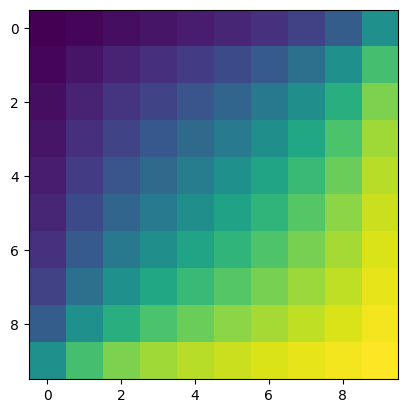

0 60 0 100


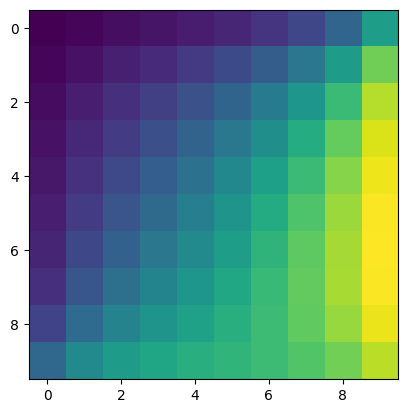

0 60 30 0


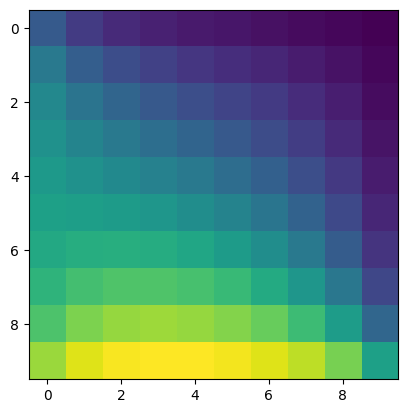

0 60 30 30


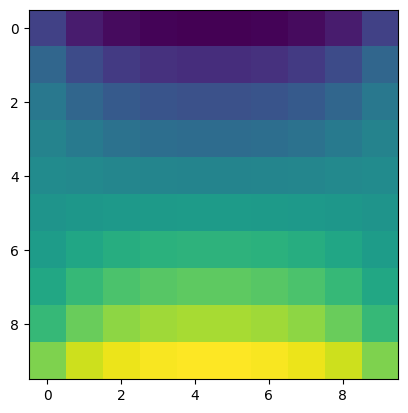

0 60 30 60


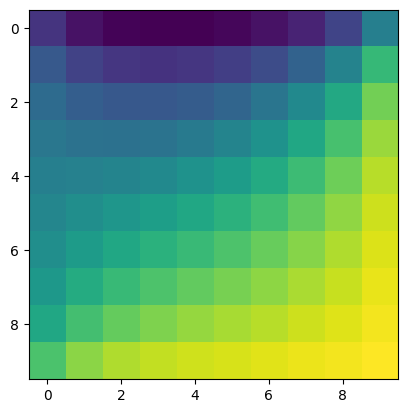

0 60 30 100


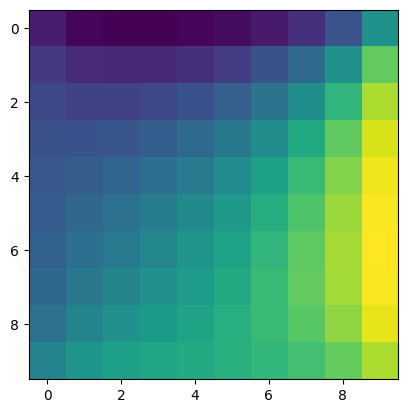

0 60 60 0


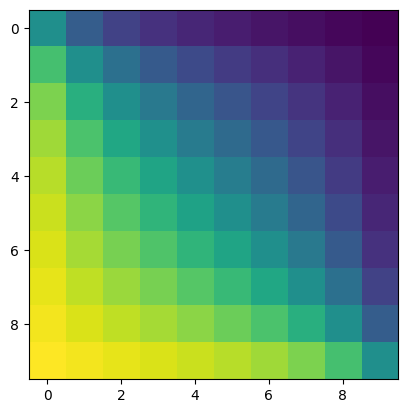

0 60 60 30


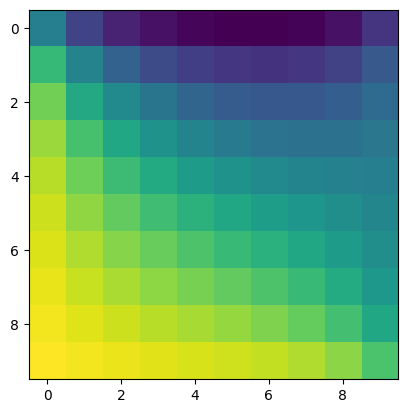

0 60 60 60


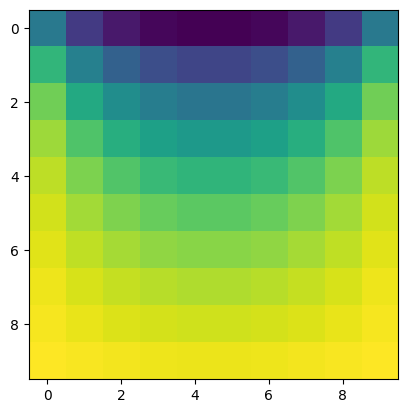

0 60 60 100


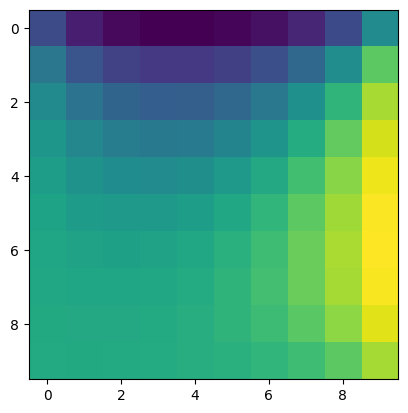

0 60 100 0


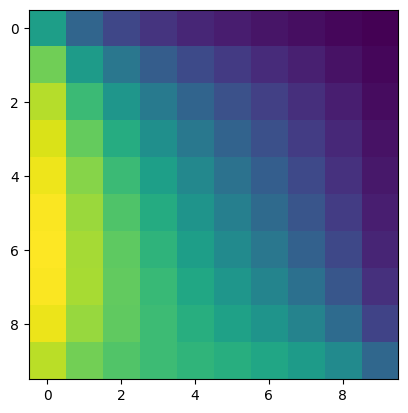

0 60 100 30


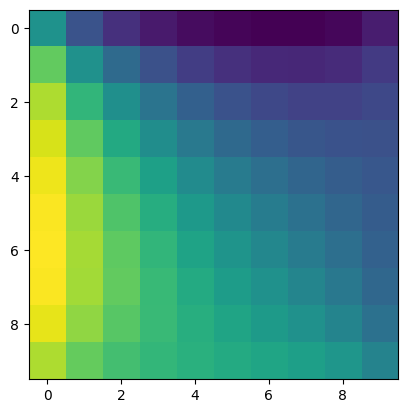

0 60 100 60


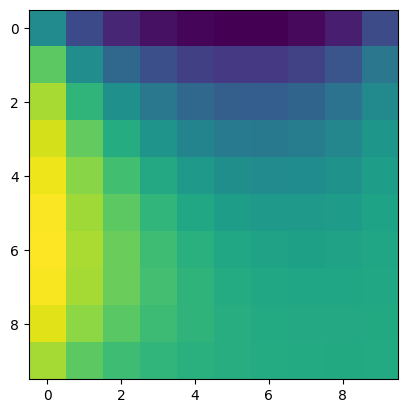

0 60 100 100


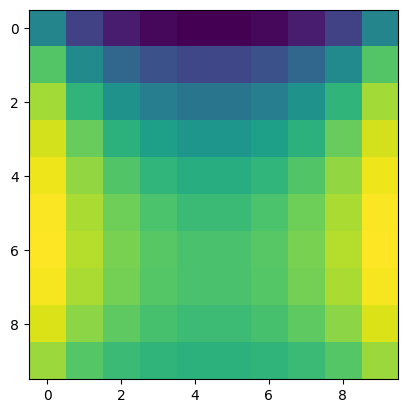

0 100 0 0


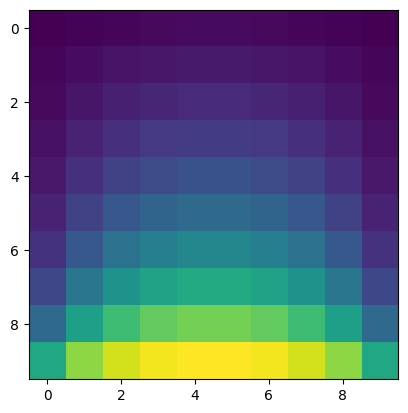

0 100 0 30


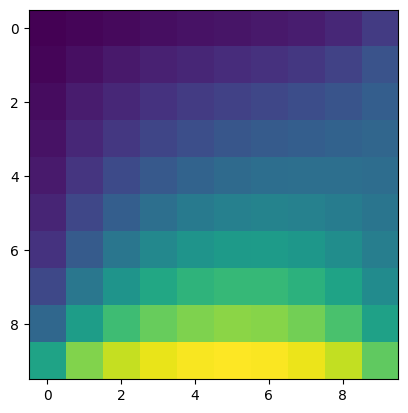

0 100 0 60


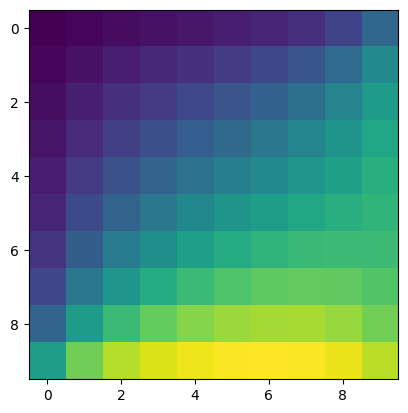

0 100 0 100


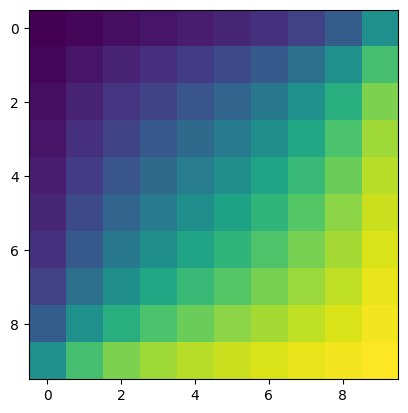

0 100 30 0


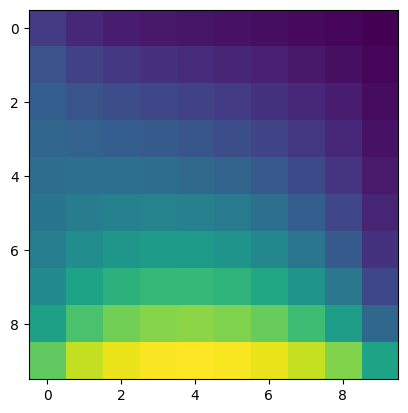

0 100 30 30


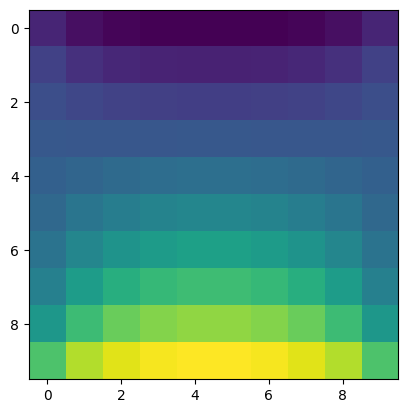

0 100 30 60


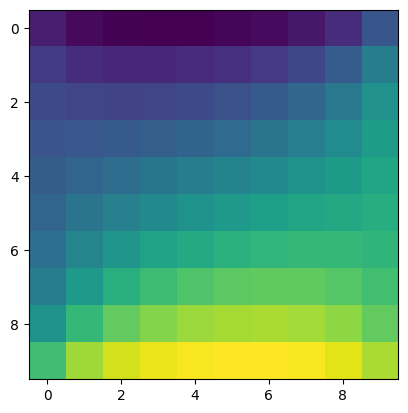

0 100 30 100


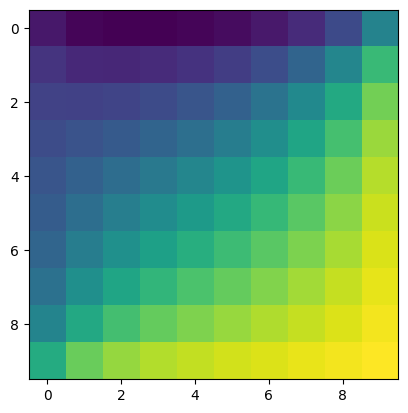

0 100 60 0


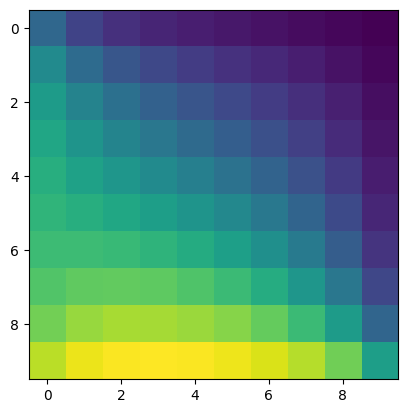

0 100 60 30


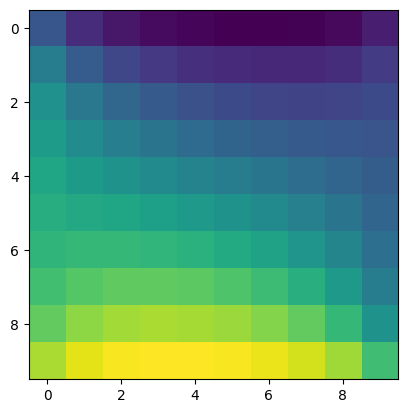

0 100 60 60


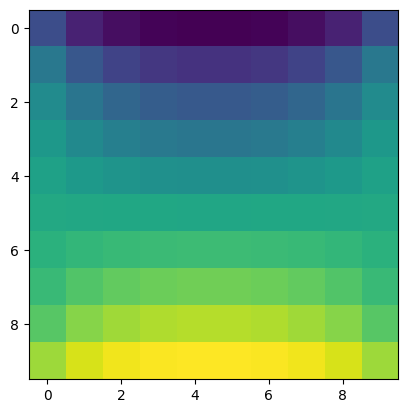

0 100 60 100


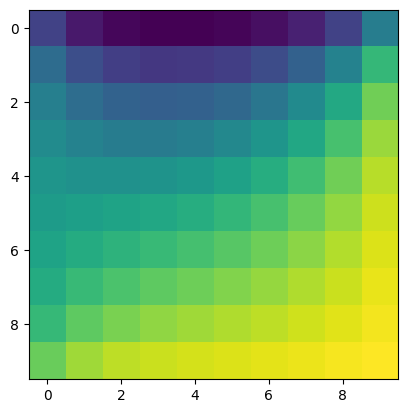

0 100 100 0


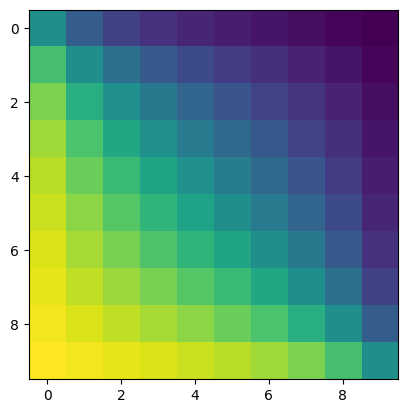

0 100 100 30


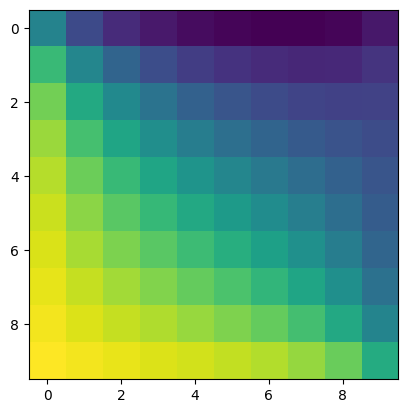

0 100 100 60


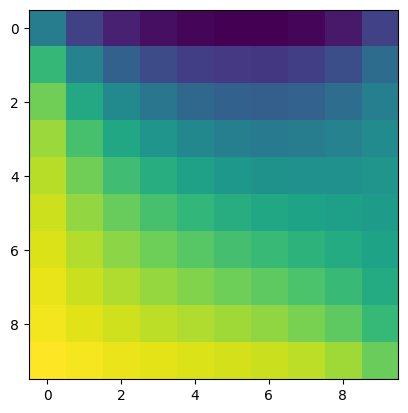

0 100 100 100


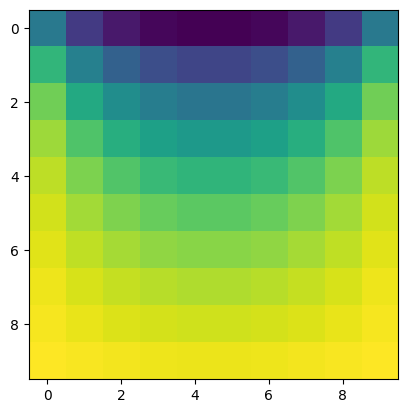

30 0 0 0


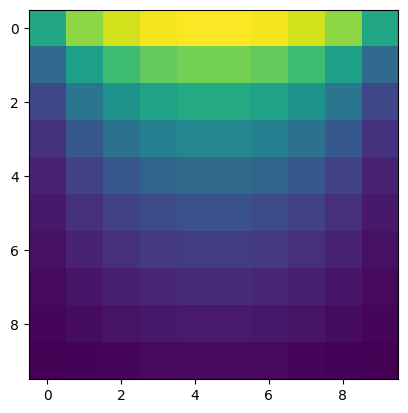

30 0 0 30


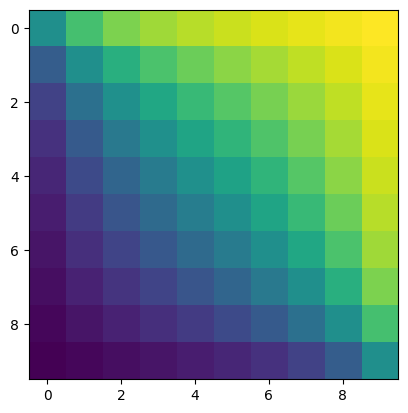

30 0 0 60


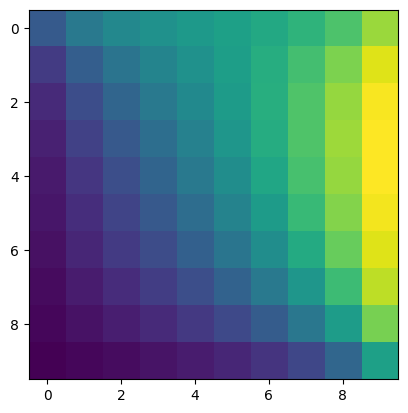

30 0 0 100


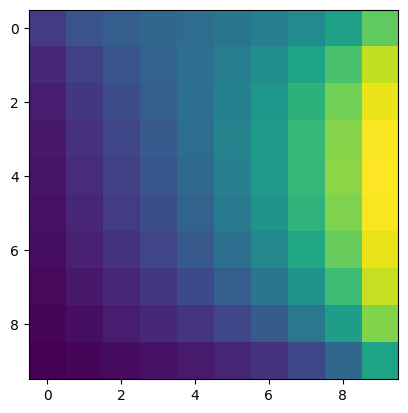

30 0 30 0


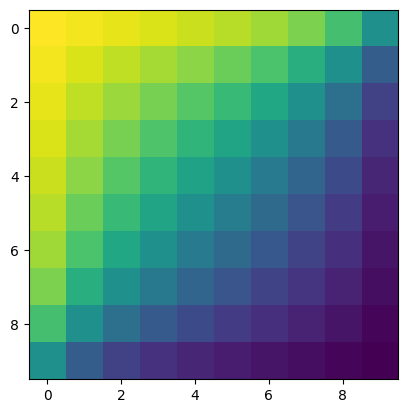

30 0 30 30


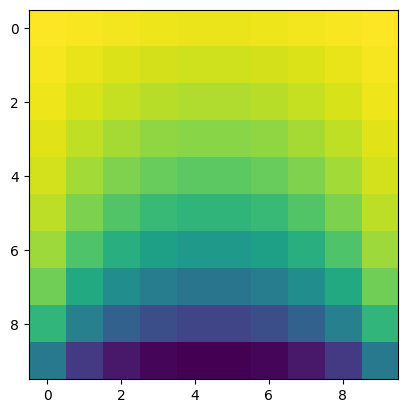

30 0 30 60


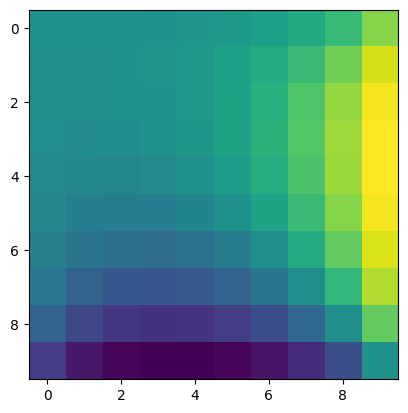

30 0 30 100


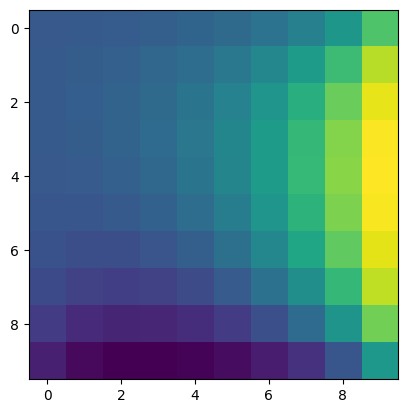

30 0 60 0


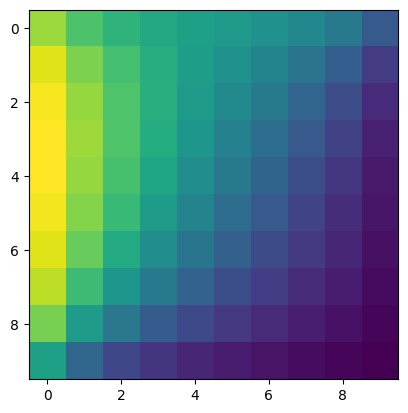

30 0 60 30


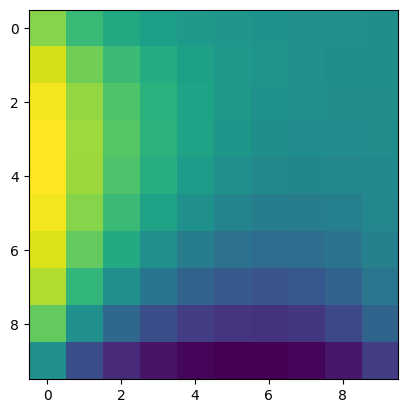

30 0 60 60


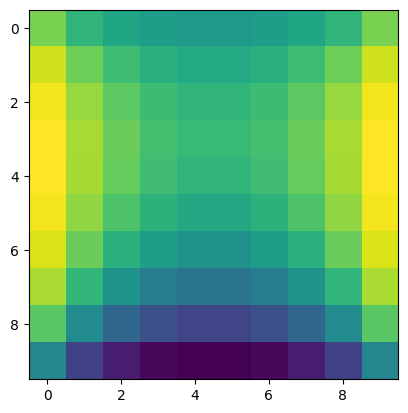

30 0 60 100


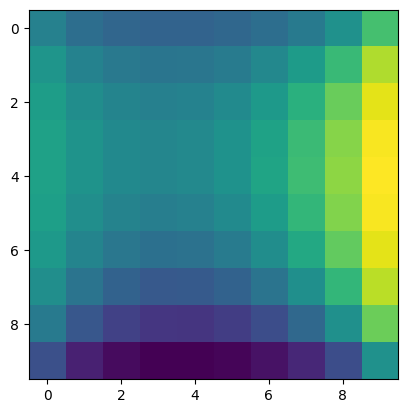

30 0 100 0


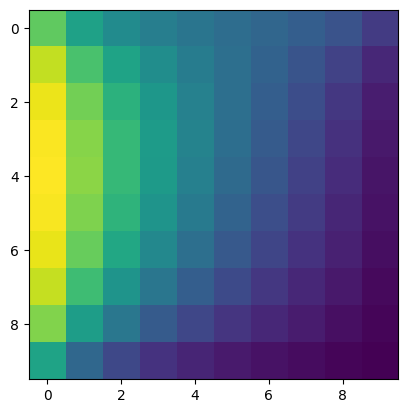

30 0 100 30


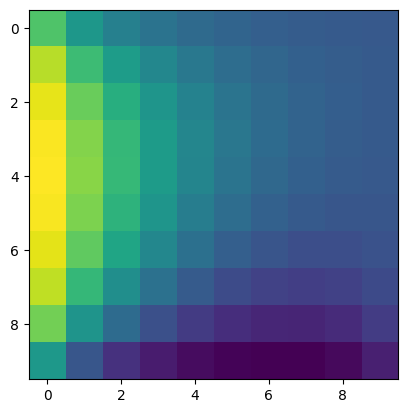

30 0 100 60


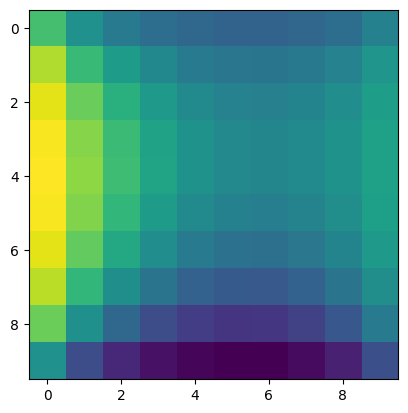

30 0 100 100


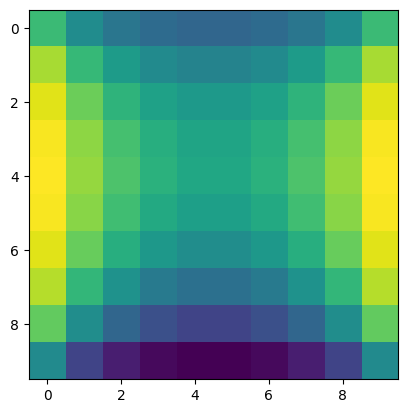

30 30 0 0


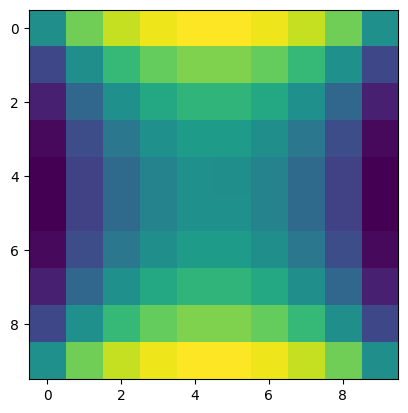

30 30 0 30


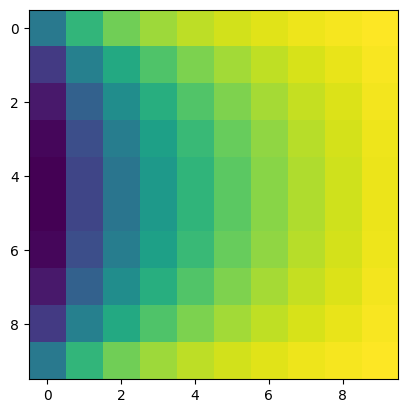

30 30 0 60


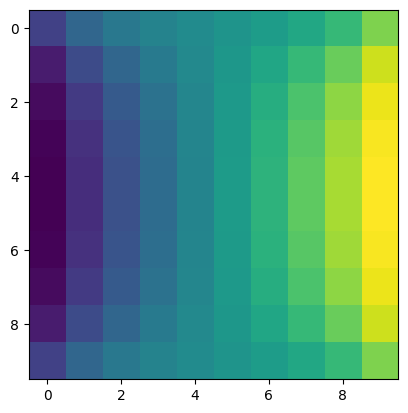

30 30 0 100


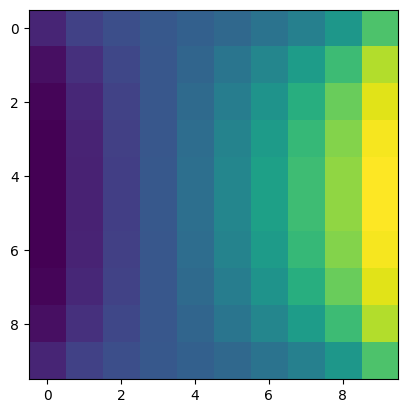

30 30 30 0


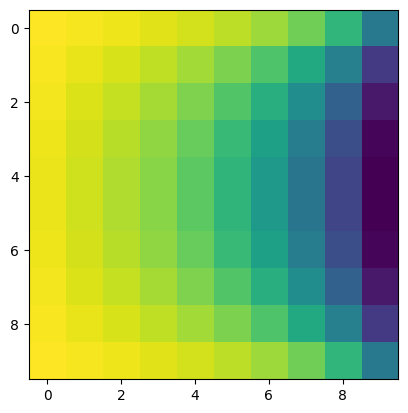

30 30 30 30


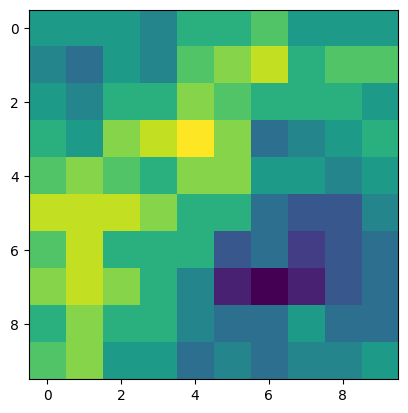

30 30 30 60


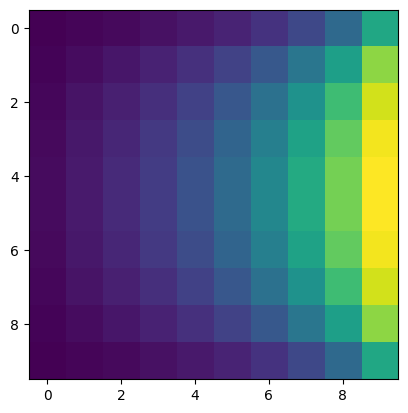

30 30 30 100


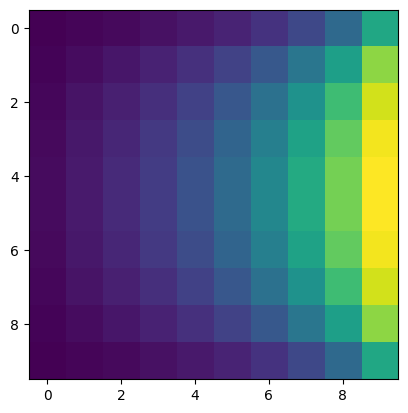

30 30 60 0


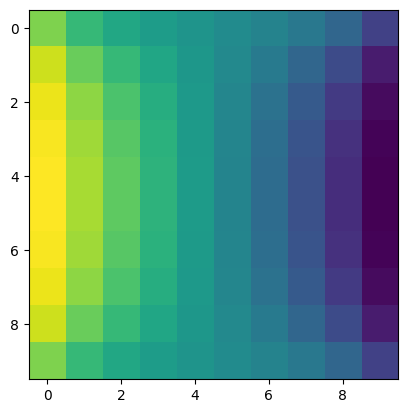

30 30 60 30


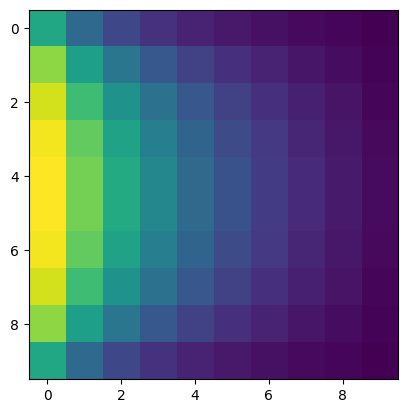

30 30 60 60


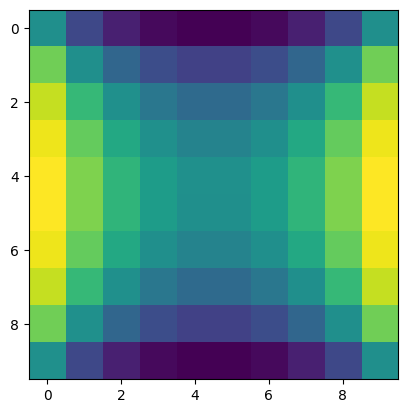

30 30 60 100


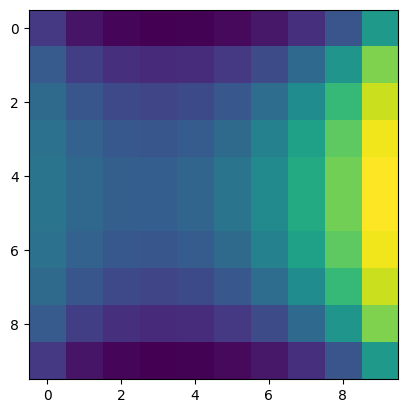

30 30 100 0


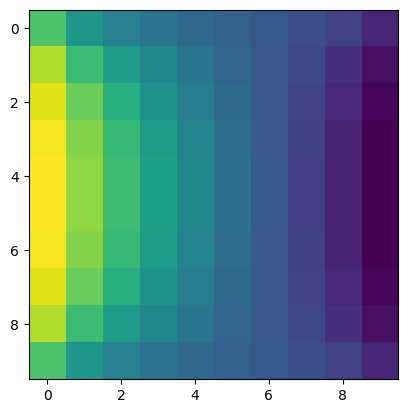

30 30 100 30


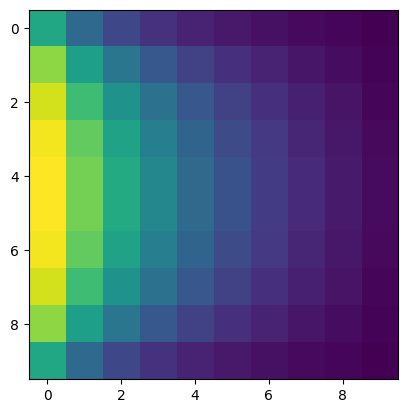

30 30 100 60


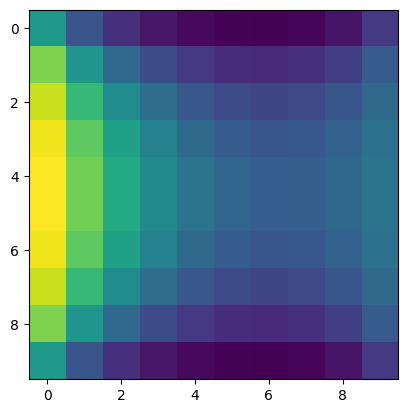

30 30 100 100


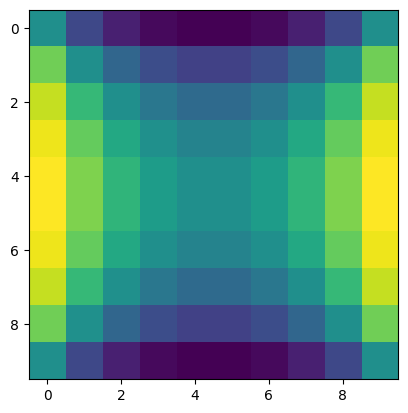

30 60 0 0


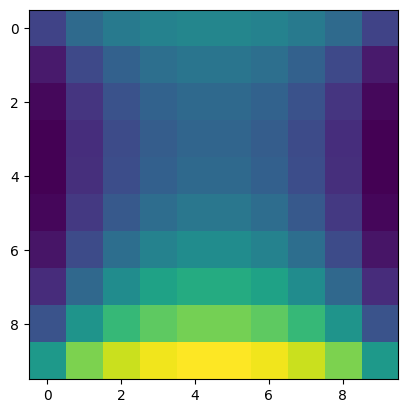

30 60 0 30


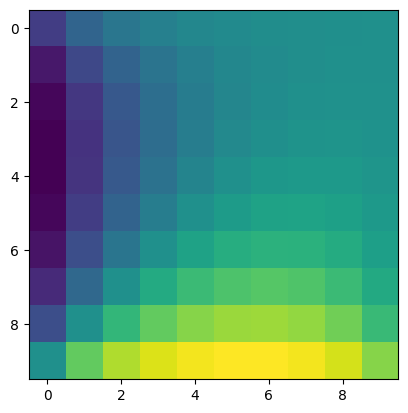

30 60 0 60


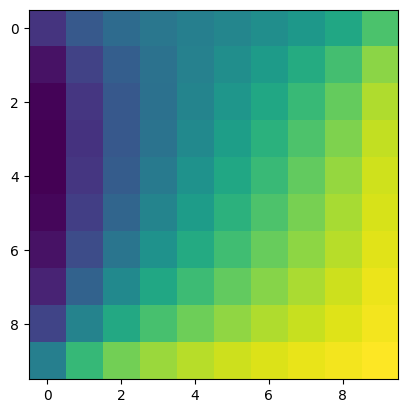

30 60 0 100


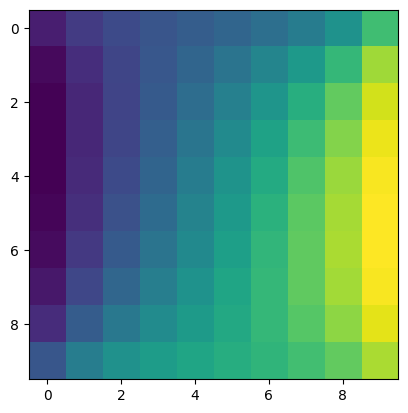

30 60 30 0


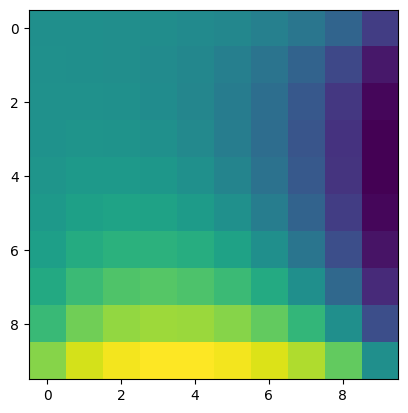

30 60 30 30


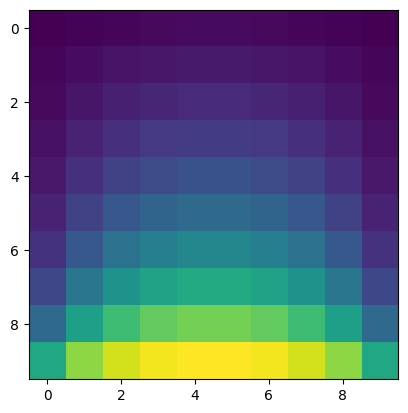

30 60 30 60


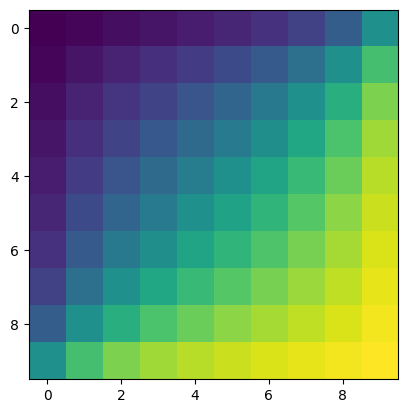

30 60 30 100


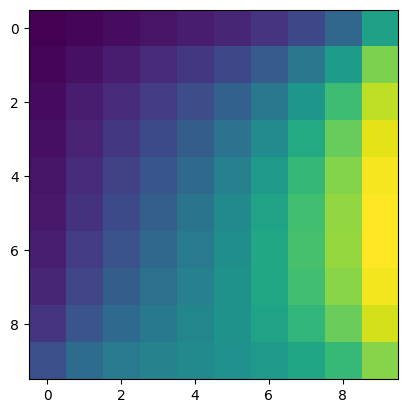

30 60 60 0


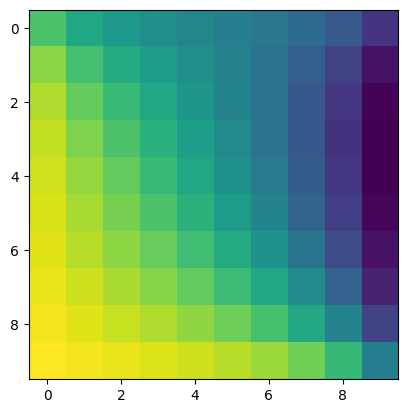

30 60 60 30


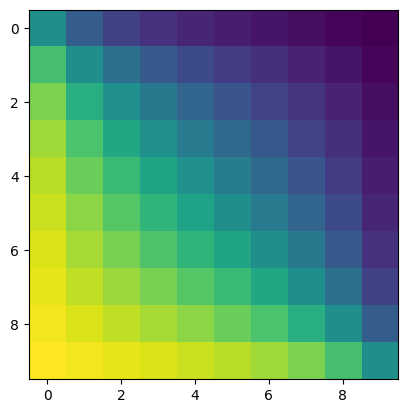

30 60 60 60


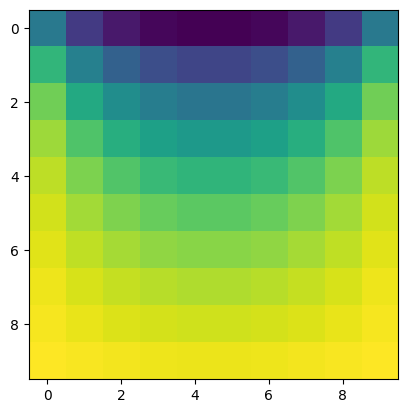

30 60 60 100


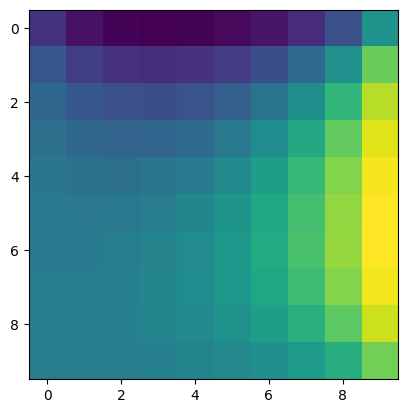

30 60 100 0


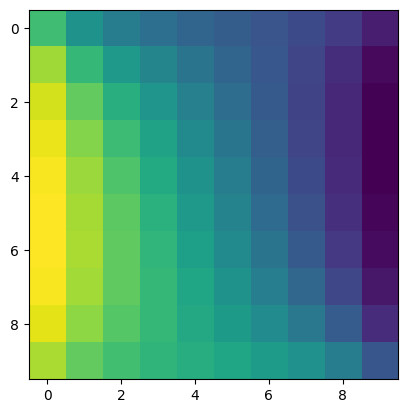

30 60 100 30


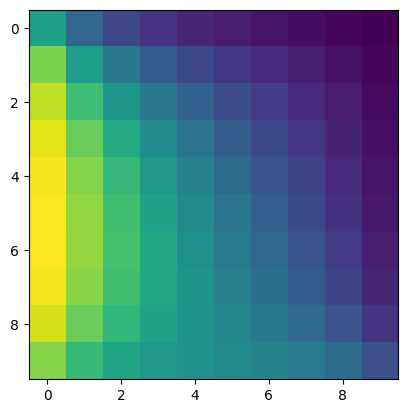

30 60 100 60


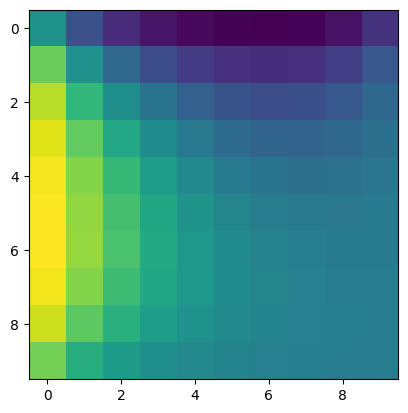

30 60 100 100


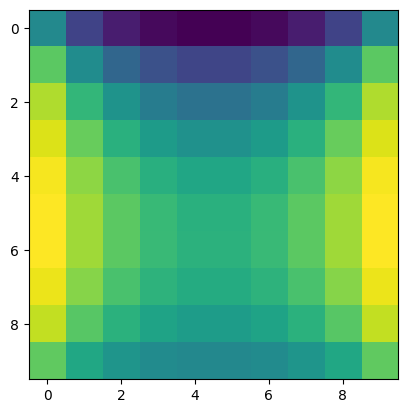

30 100 0 0


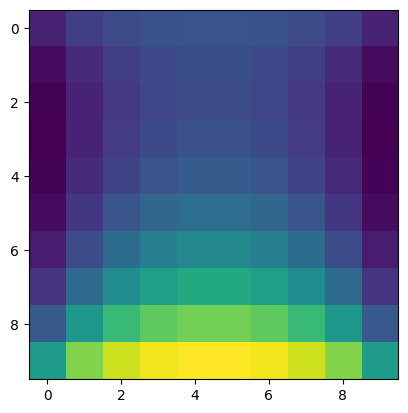

30 100 0 30


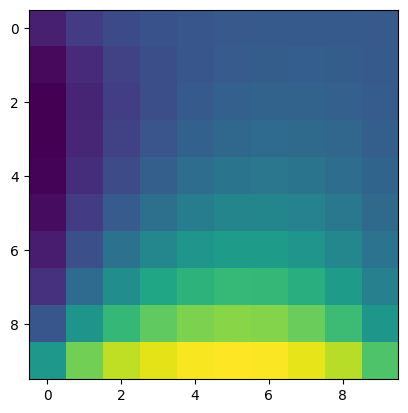

30 100 0 60


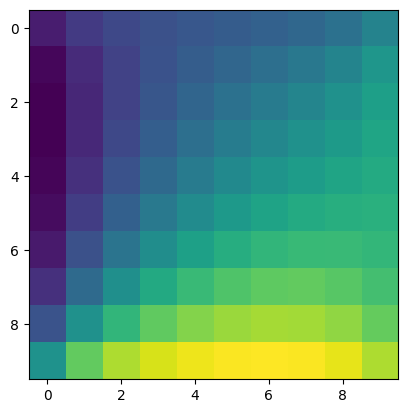

30 100 0 100


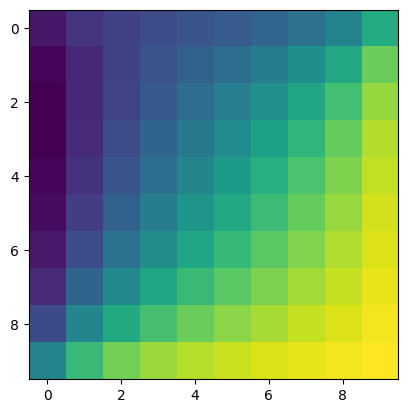

30 100 30 0


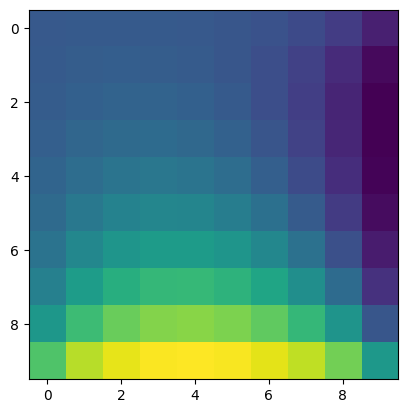

30 100 30 30


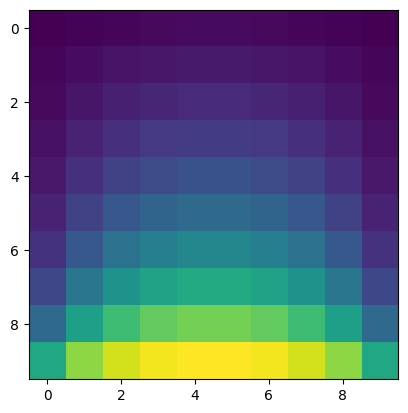

30 100 30 60


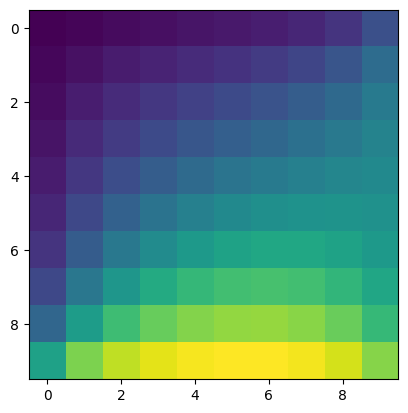

30 100 30 100


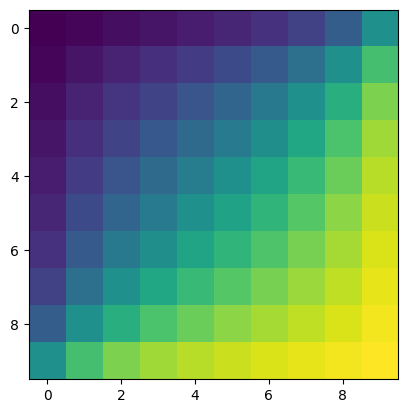

30 100 60 0


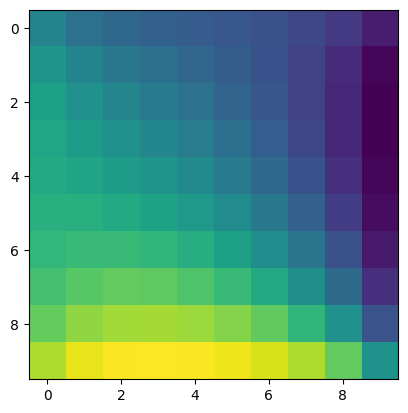

30 100 60 30


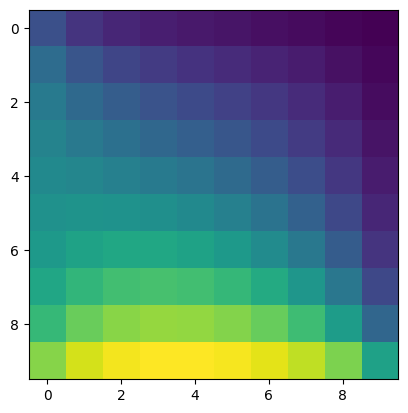

30 100 60 60


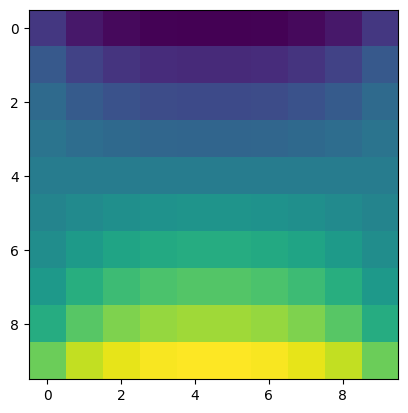

30 100 60 100


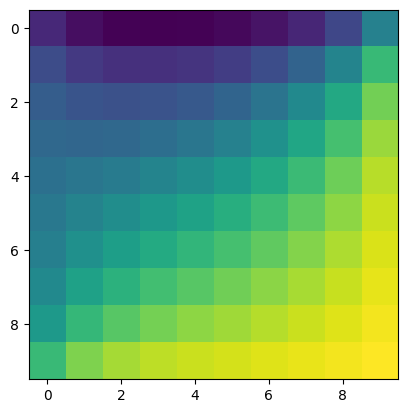

30 100 100 0


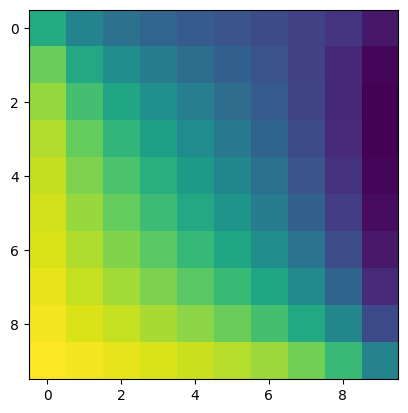

30 100 100 30


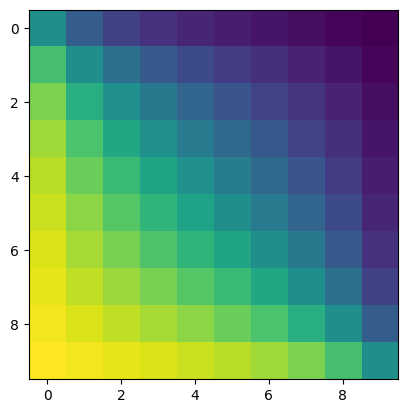

30 100 100 60


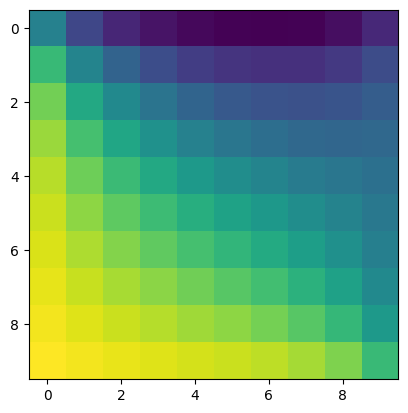

30 100 100 100


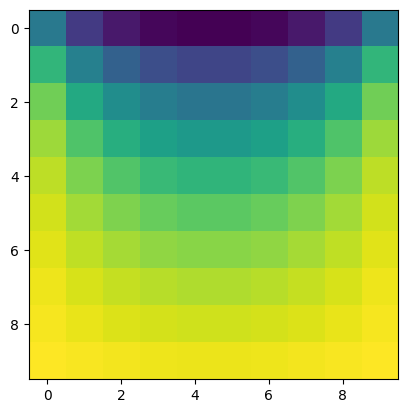

60 0 0 0


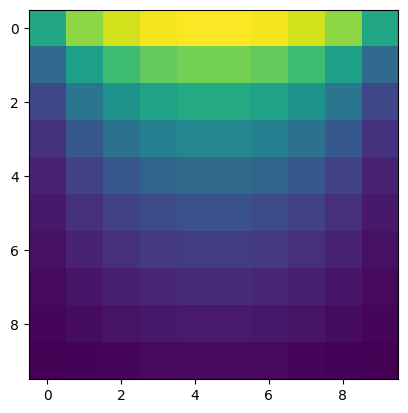

60 0 0 30


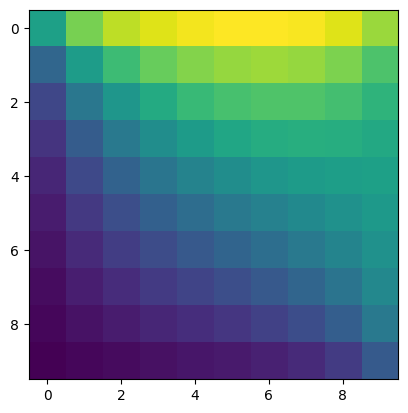

60 0 0 60


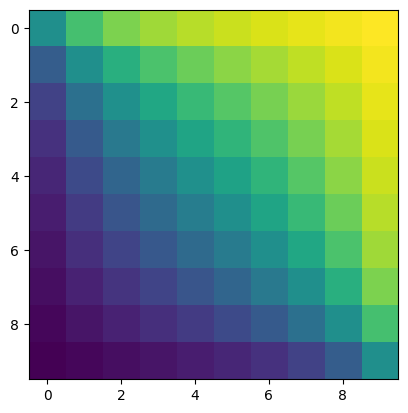

60 0 0 100


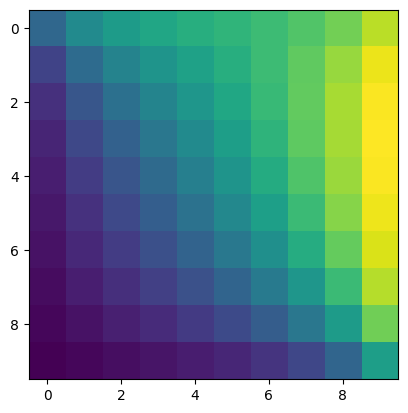

60 0 30 0


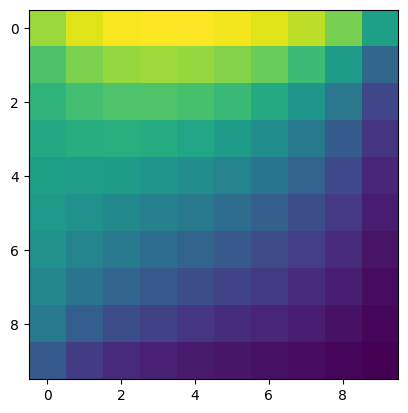

60 0 30 30


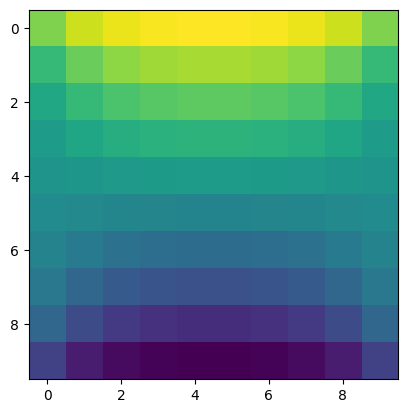

60 0 30 60


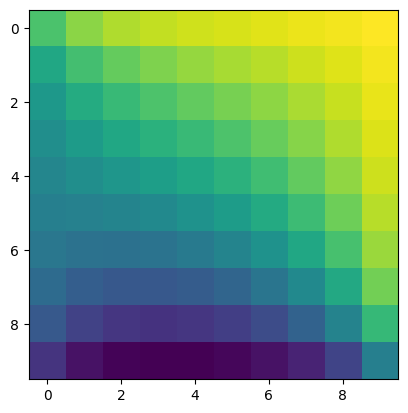

60 0 30 100


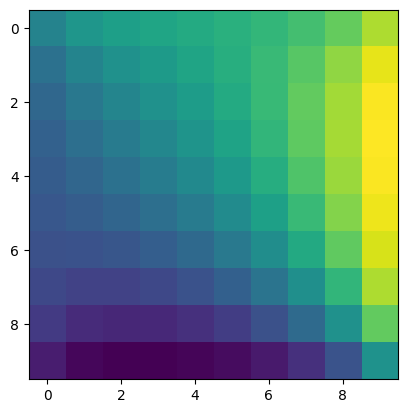

60 0 60 0


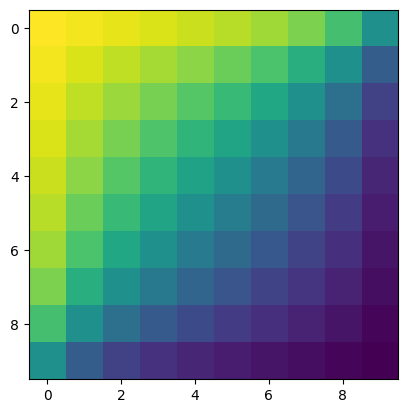

60 0 60 30


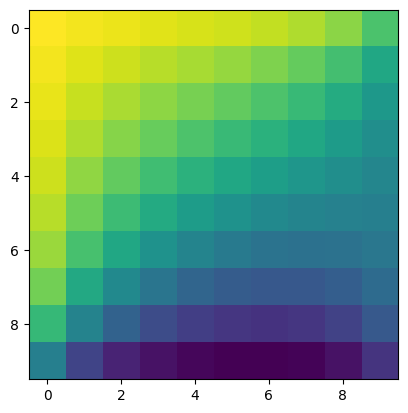

60 0 60 60


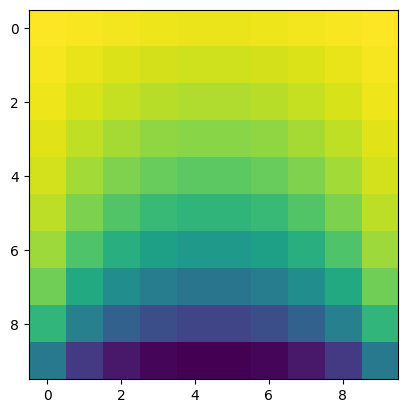

60 0 60 100


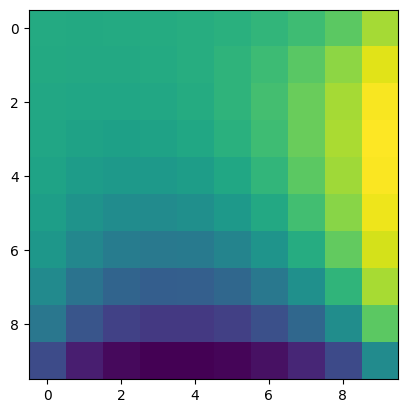

60 0 100 0


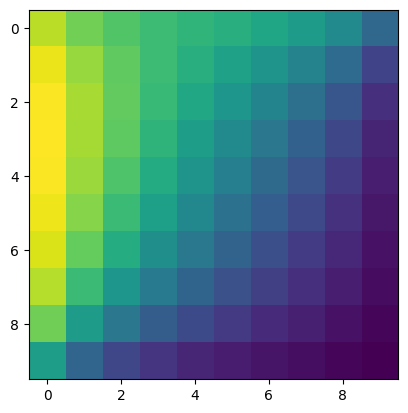

60 0 100 30


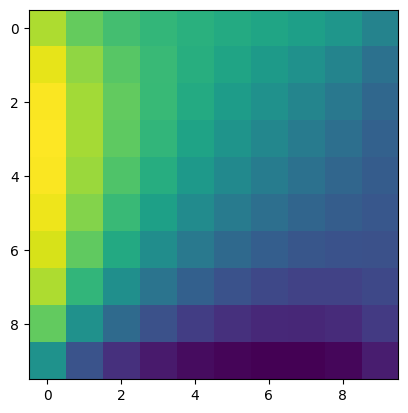

60 0 100 60


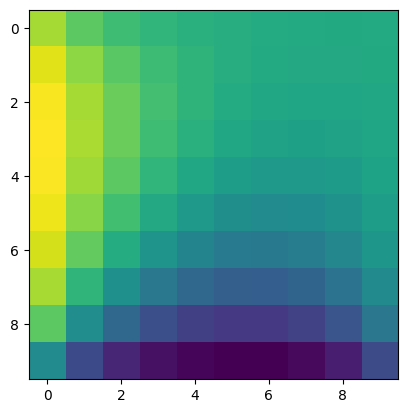

60 0 100 100


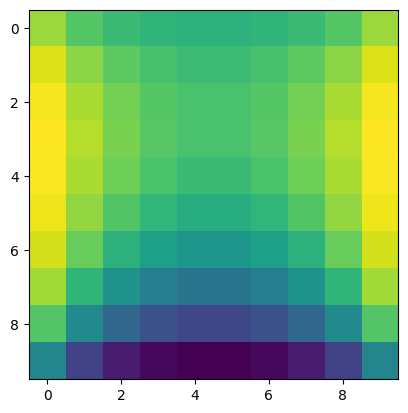

60 30 0 0


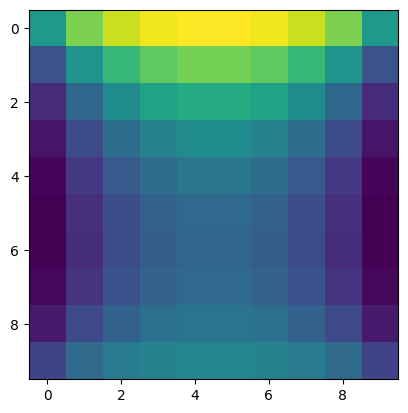

60 30 0 30


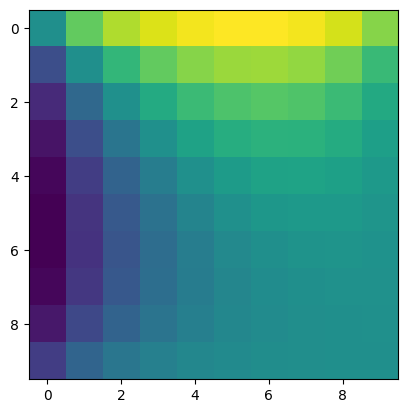

60 30 0 60


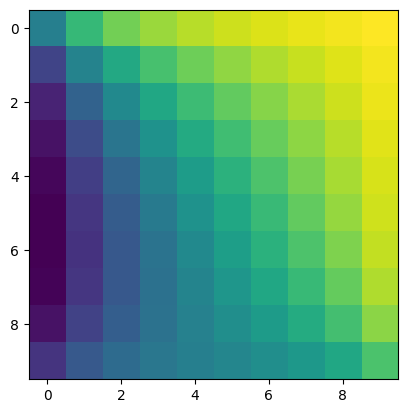

60 30 0 100


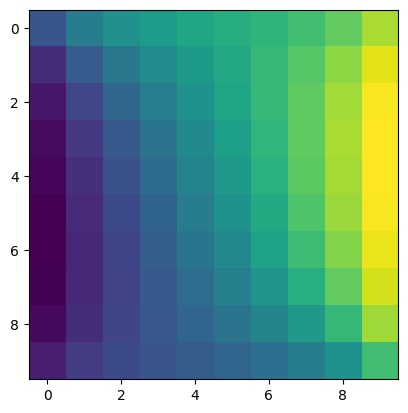

60 30 30 0


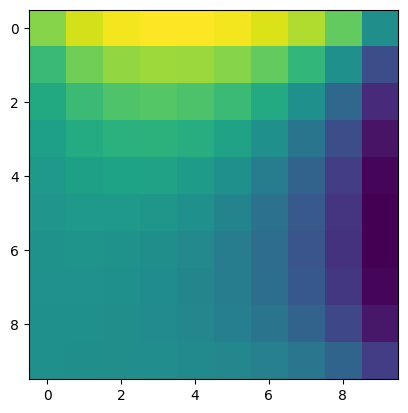

60 30 30 30


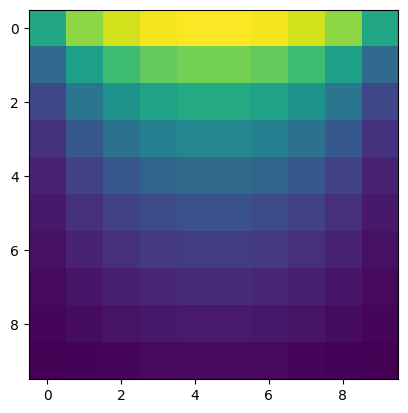

60 30 30 60


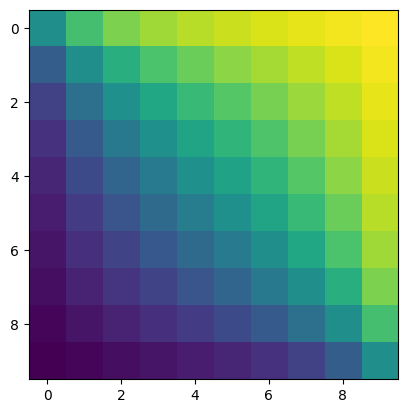

60 30 30 100


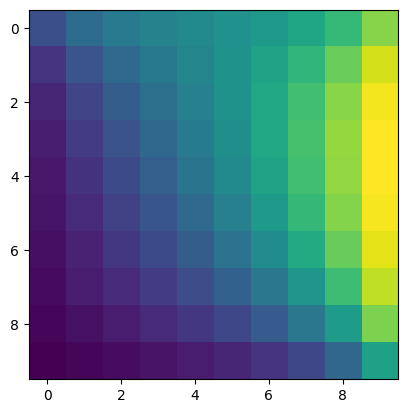

60 30 60 0


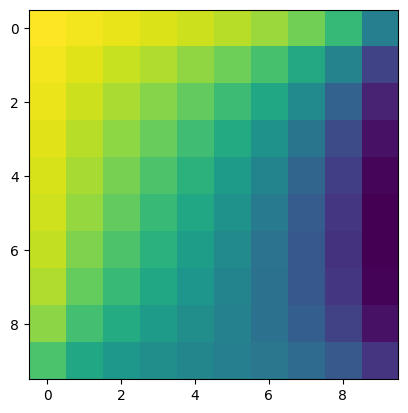

60 30 60 30


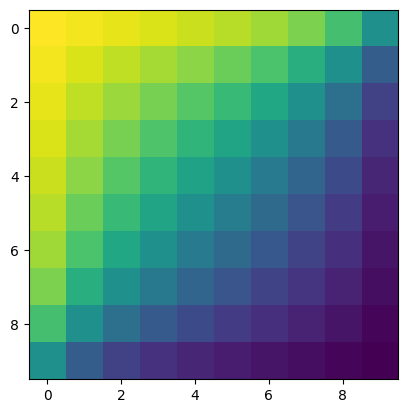

60 30 60 60


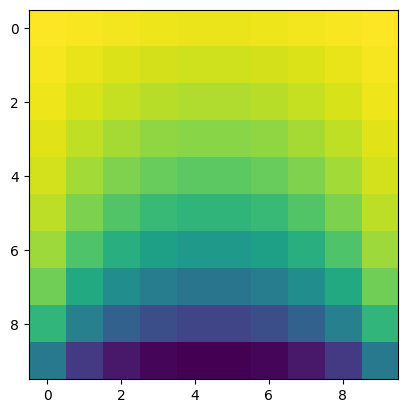

60 30 60 100


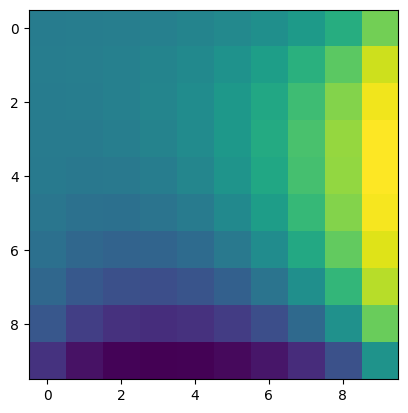

60 30 100 0


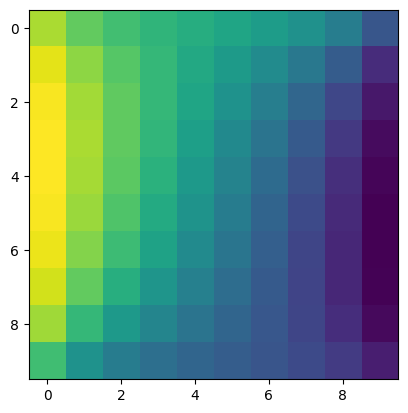

60 30 100 30


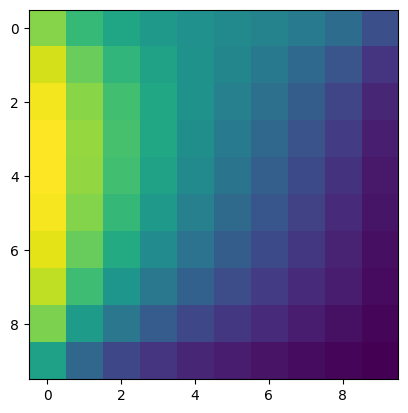

60 30 100 60


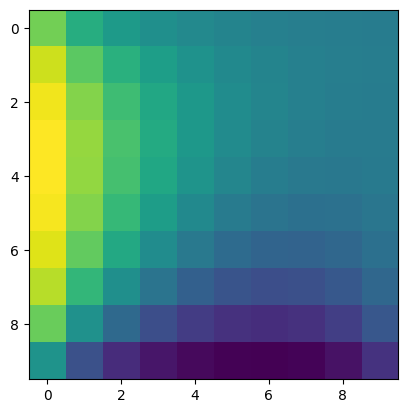

60 30 100 100


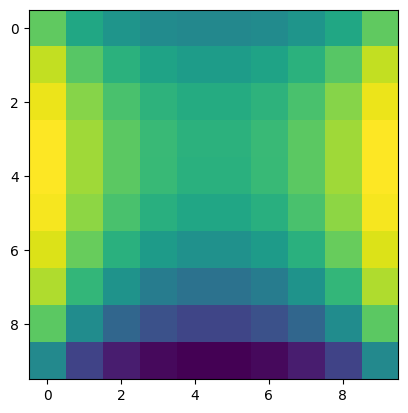

60 60 0 0


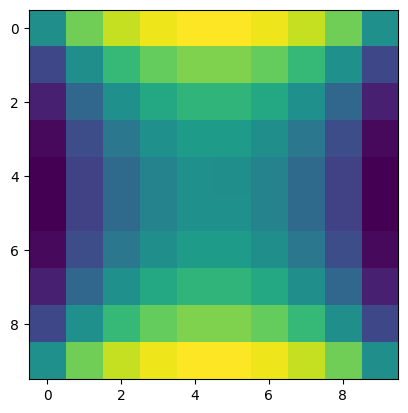

60 60 0 30


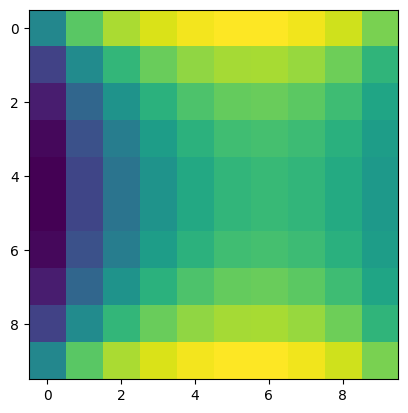

60 60 0 60


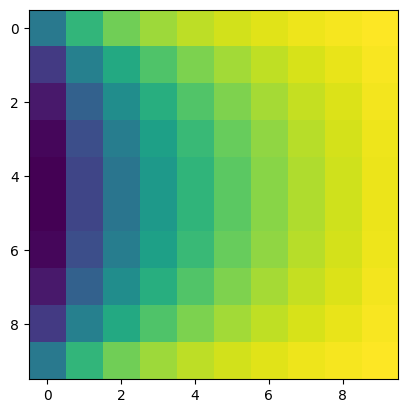

60 60 0 100


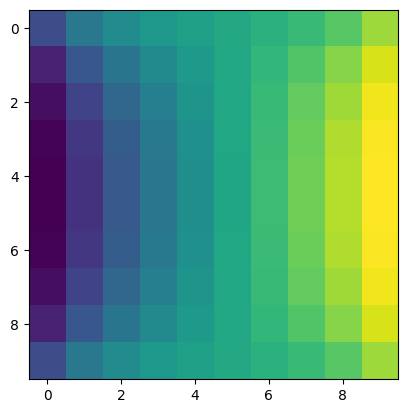

60 60 30 0


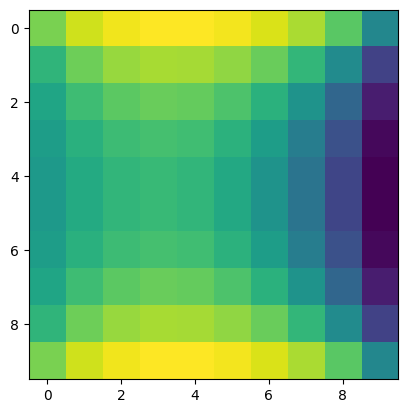

60 60 30 30


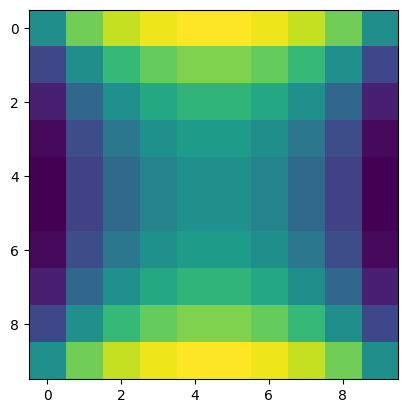

60 60 30 60


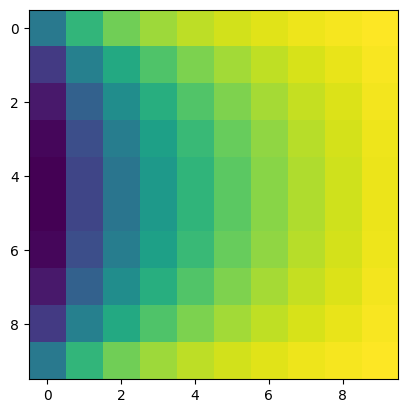

60 60 30 100


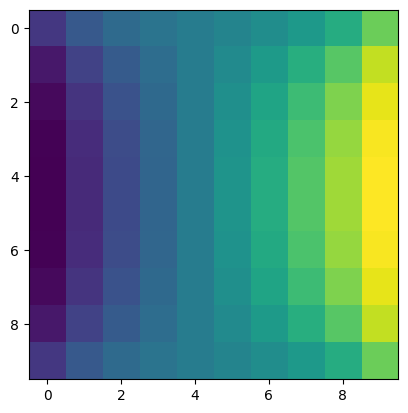

60 60 60 0


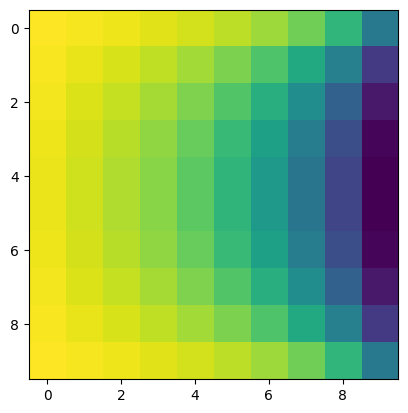

60 60 60 30


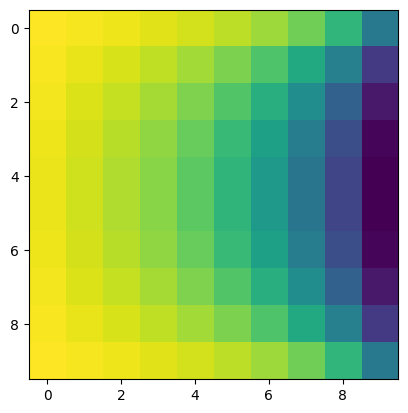

60 60 60 60


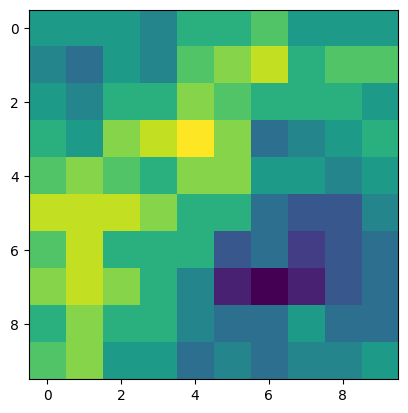

60 60 60 100


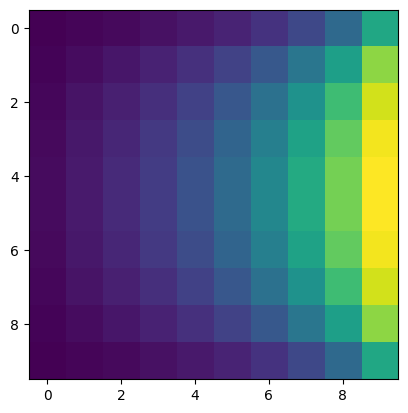

60 60 100 0


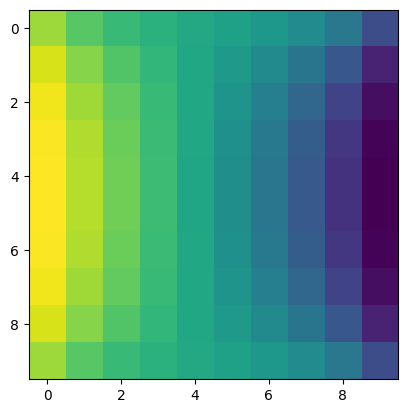

60 60 100 30


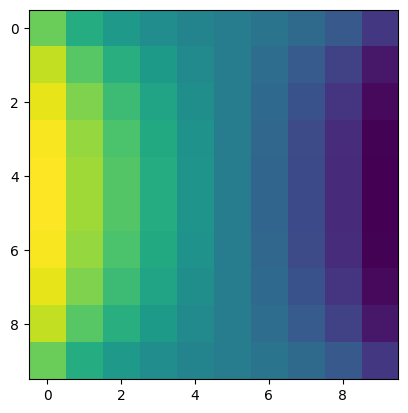

60 60 100 60


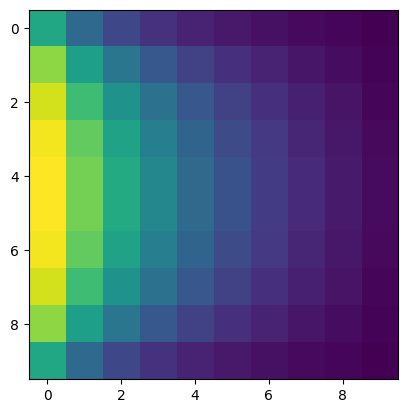

60 60 100 100


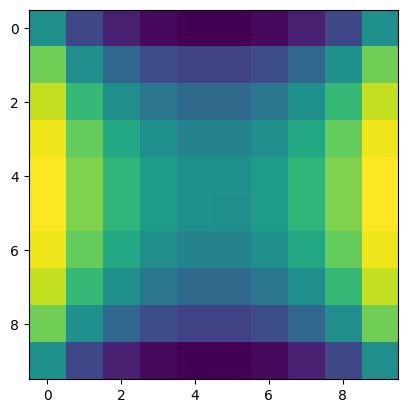

60 100 0 0


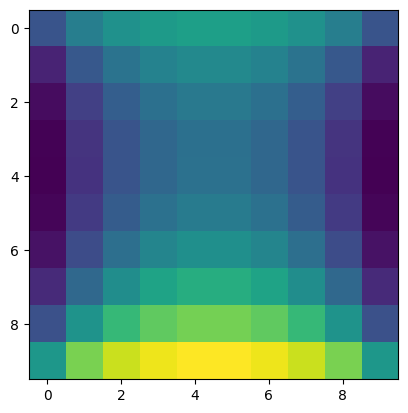

60 100 0 30


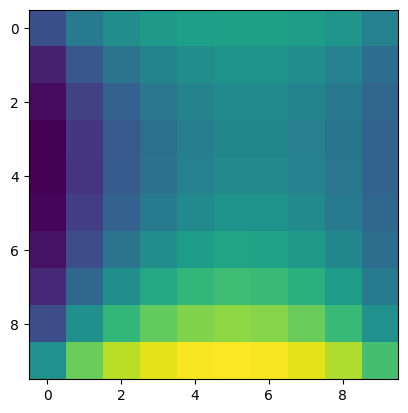

60 100 0 60


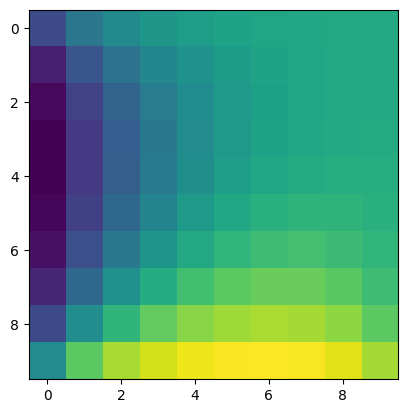

60 100 0 100


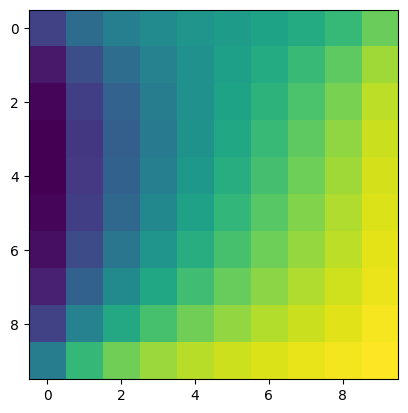

60 100 30 0


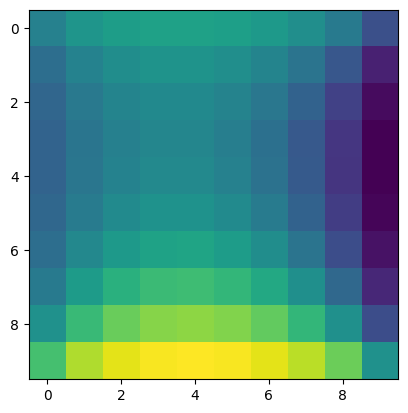

60 100 30 30


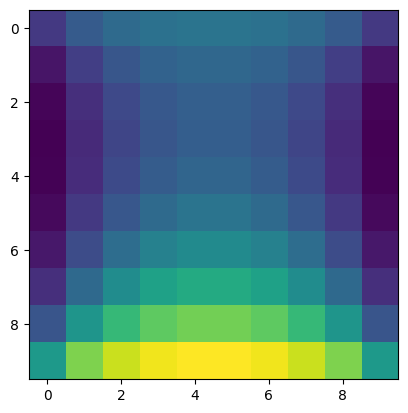

60 100 30 60


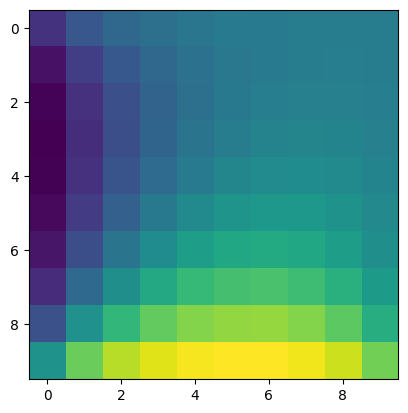

60 100 30 100


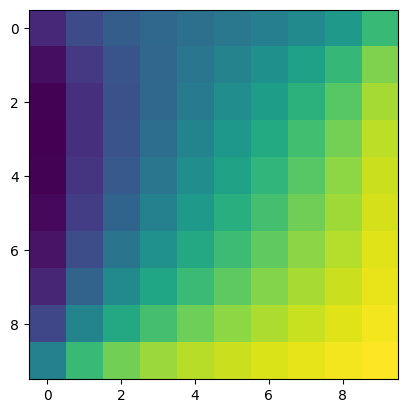

60 100 60 0


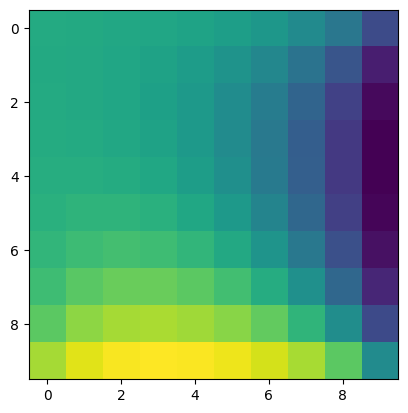

60 100 60 30


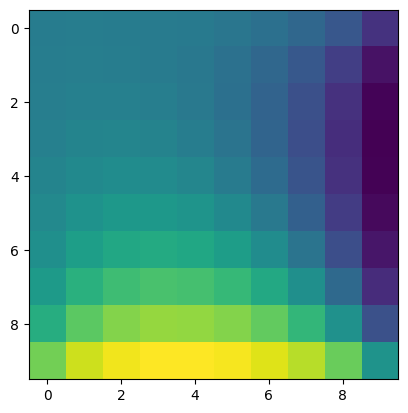

60 100 60 60


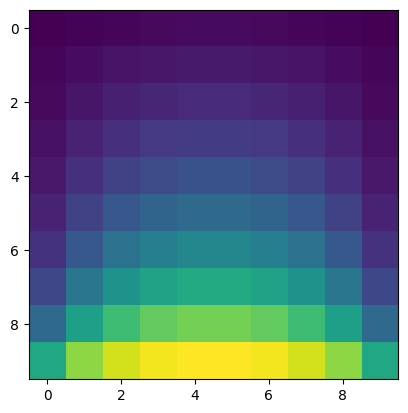

60 100 60 100


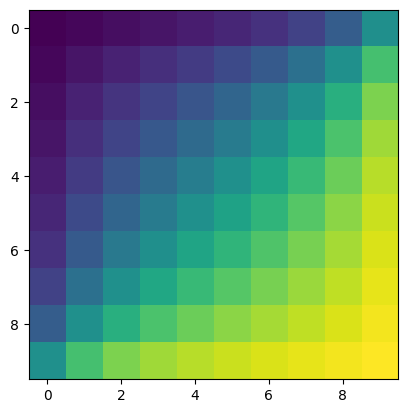

60 100 100 0


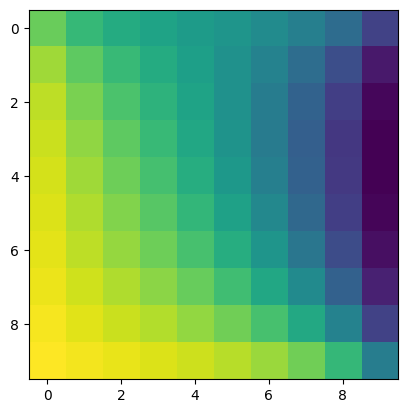

60 100 100 30


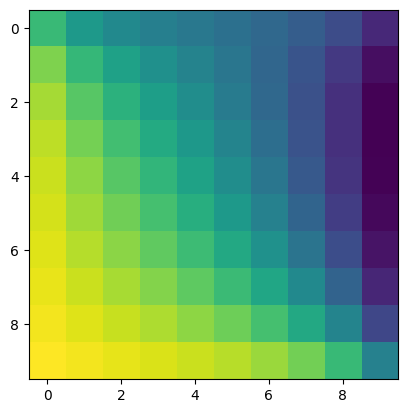

60 100 100 60


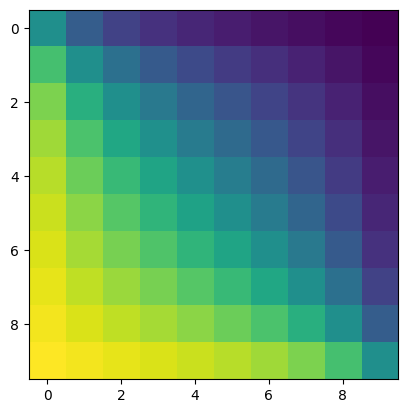

60 100 100 100


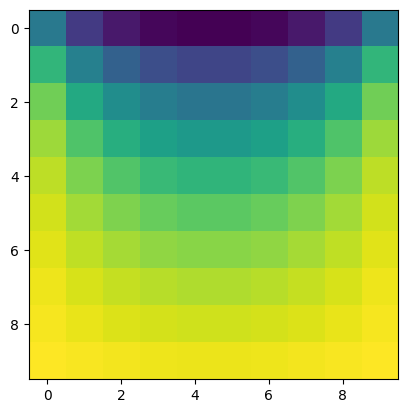

100 0 0 0


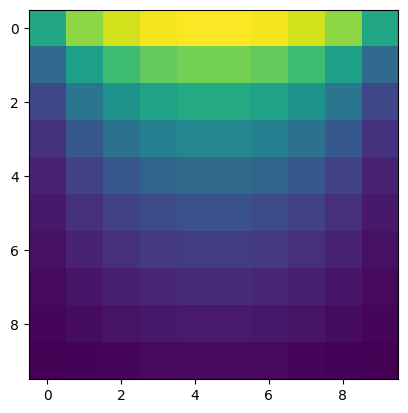

100 0 0 30


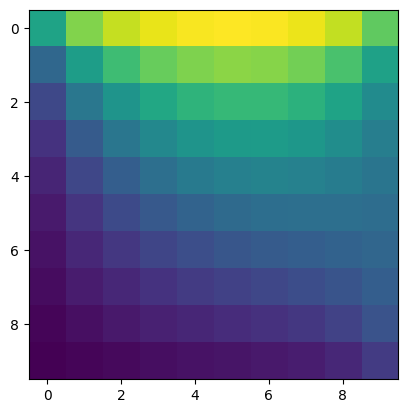

100 0 0 60


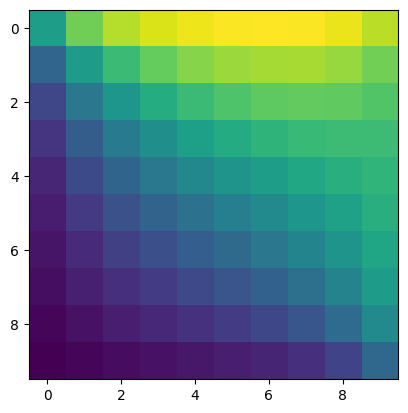

100 0 0 100


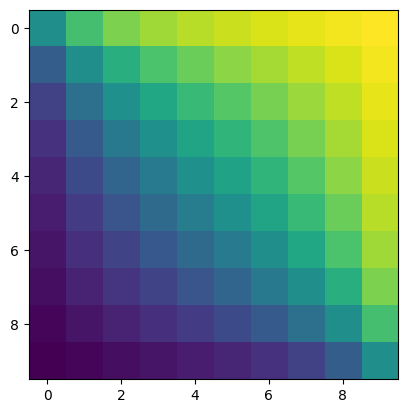

100 0 30 0


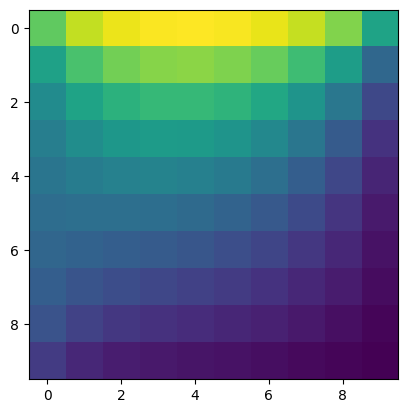

100 0 30 30


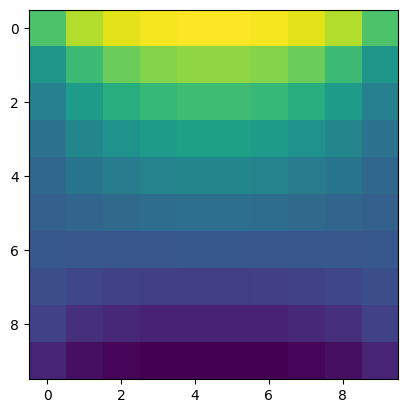

100 0 30 60


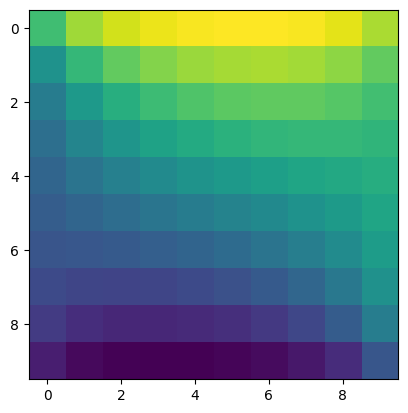

100 0 30 100


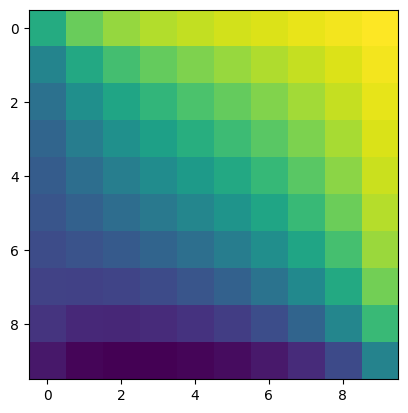

100 0 60 0


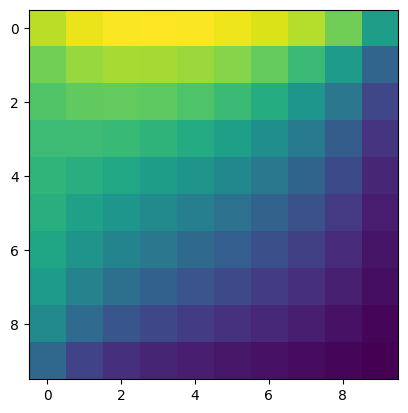

100 0 60 30


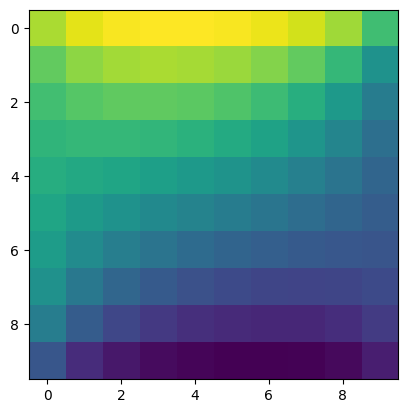

100 0 60 60


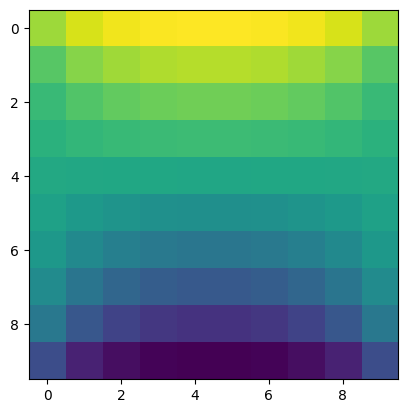

100 0 60 100


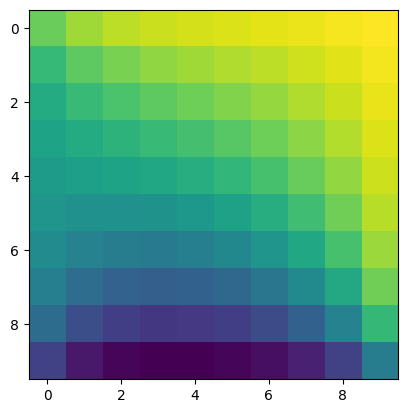

100 0 100 0


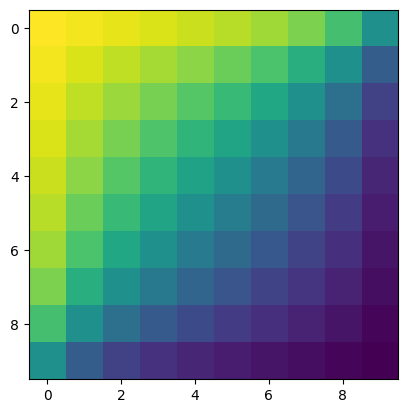

100 0 100 30


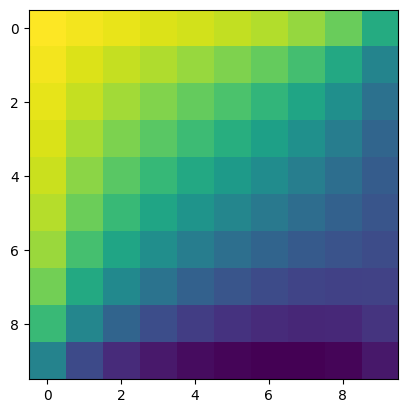

100 0 100 60


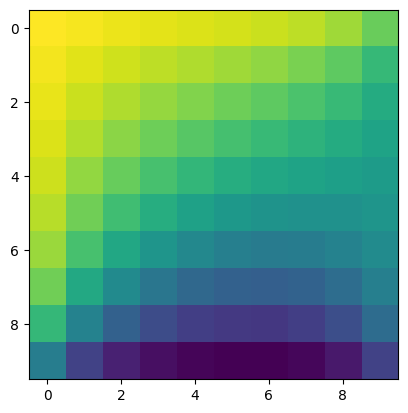

100 0 100 100


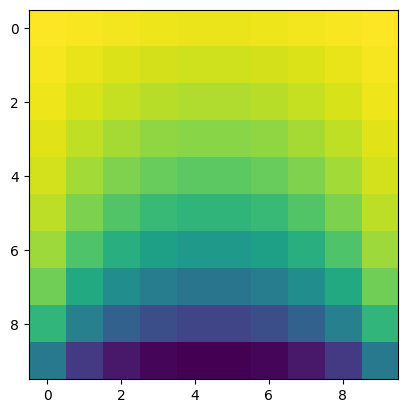

100 30 0 0


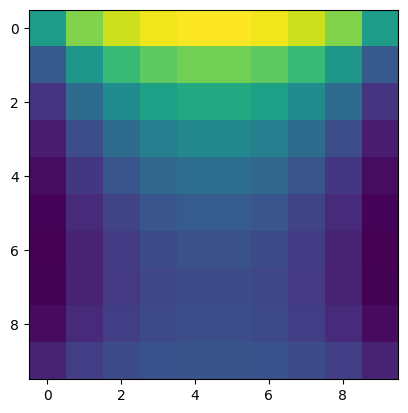

100 30 0 30


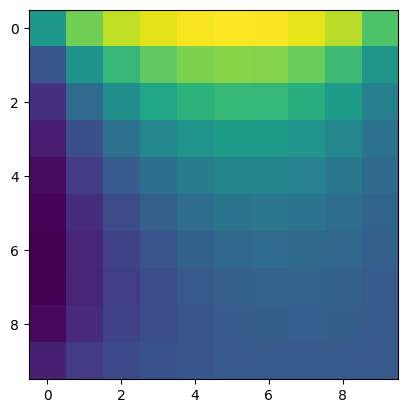

100 30 0 60


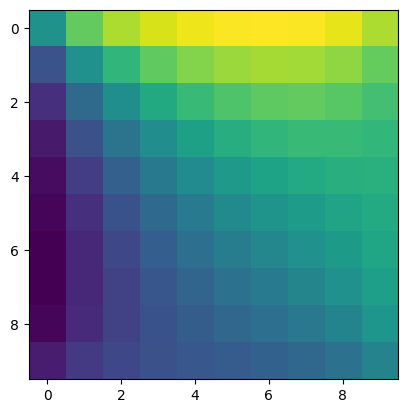

100 30 0 100


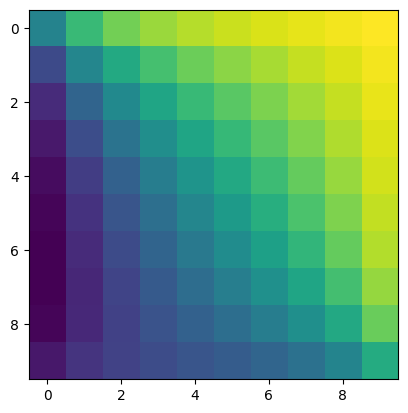

100 30 30 0


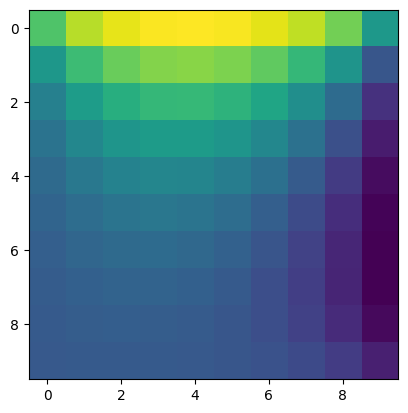

100 30 30 30


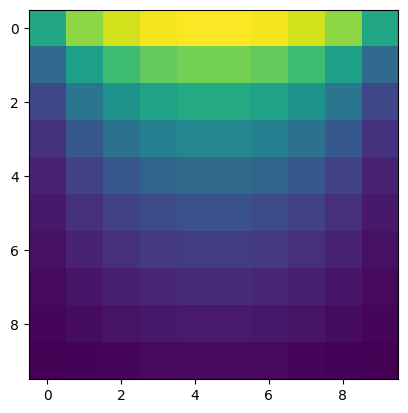

100 30 30 60


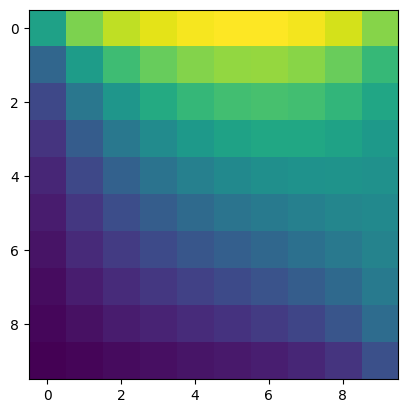

100 30 30 100


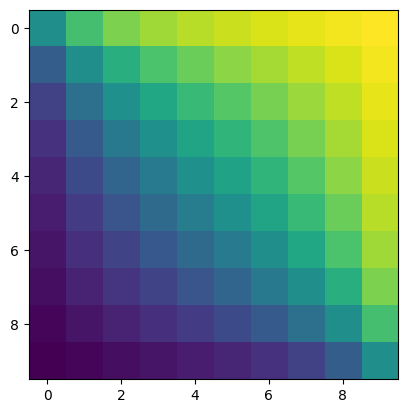

100 30 60 0


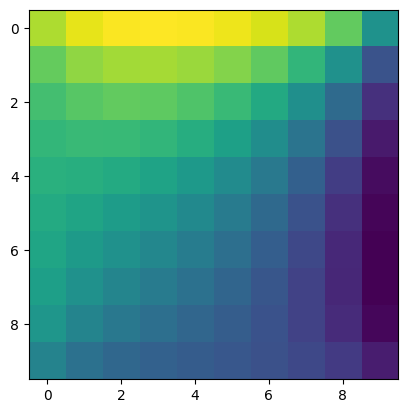

100 30 60 30


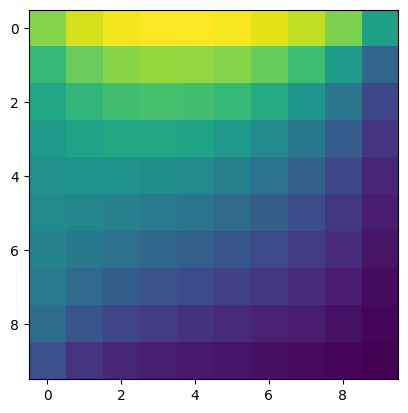

100 30 60 60


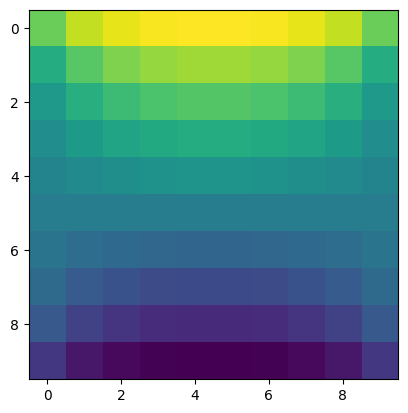

100 30 60 100


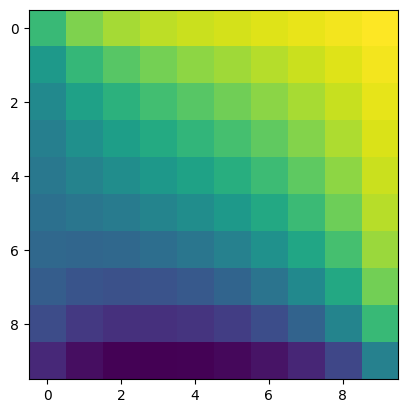

100 30 100 0


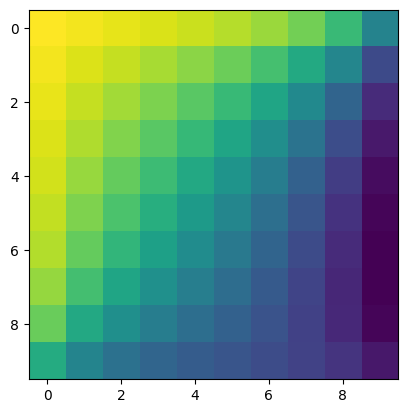

100 30 100 30


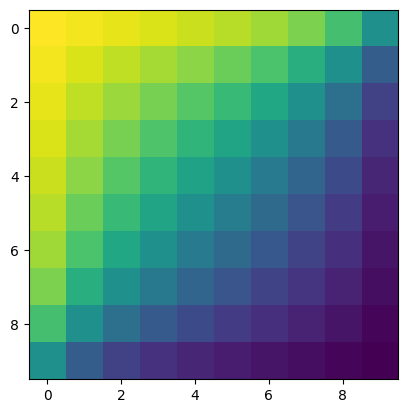

100 30 100 60


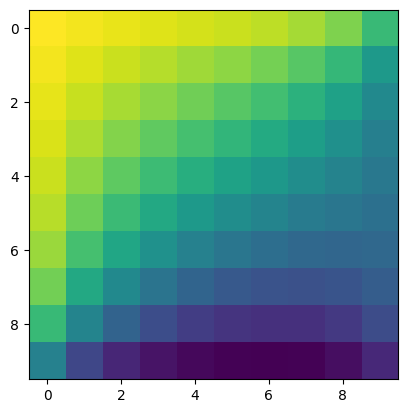

100 30 100 100


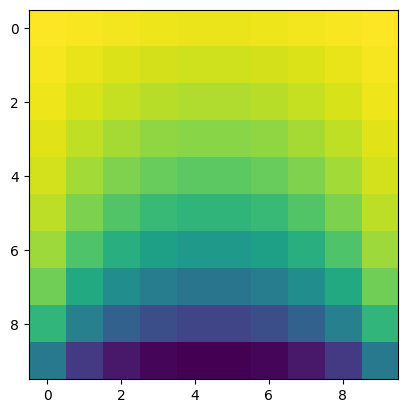

100 60 0 0


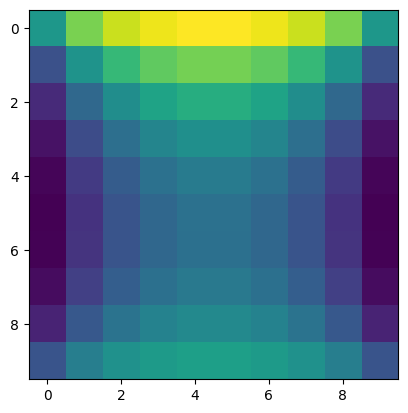

100 60 0 30


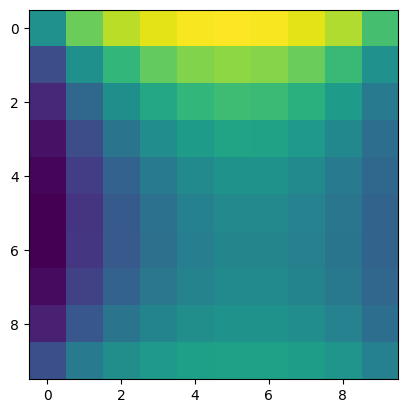

100 60 0 60


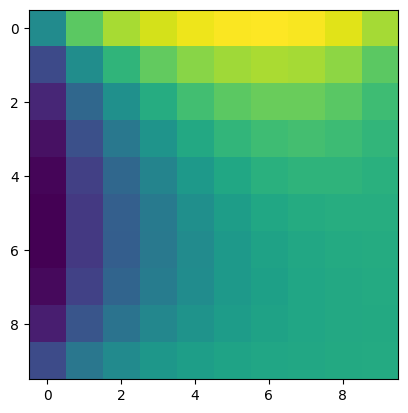

100 60 0 100


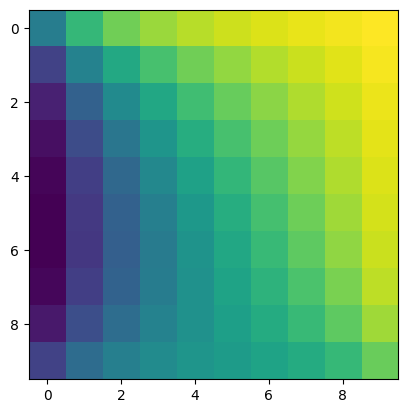

100 60 30 0


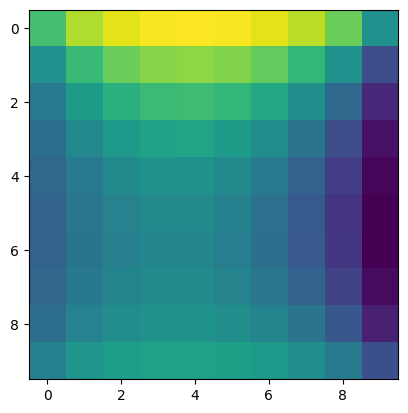

100 60 30 30


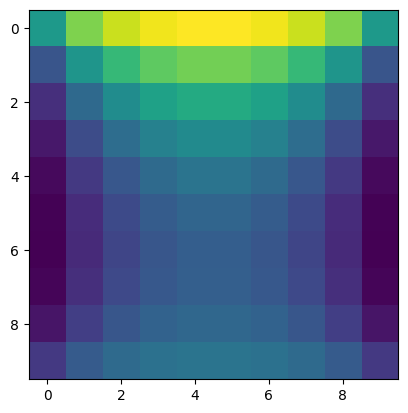

100 60 30 60


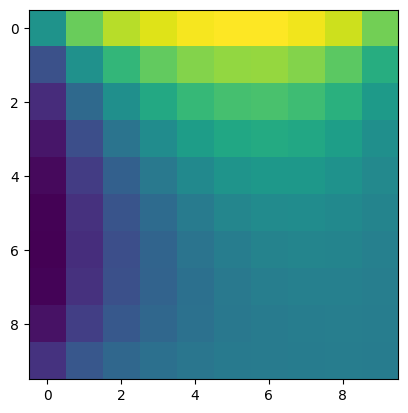

100 60 30 100


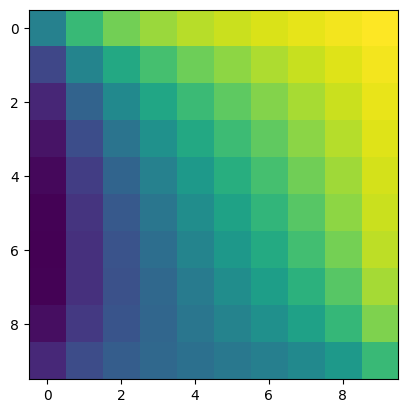

100 60 60 0


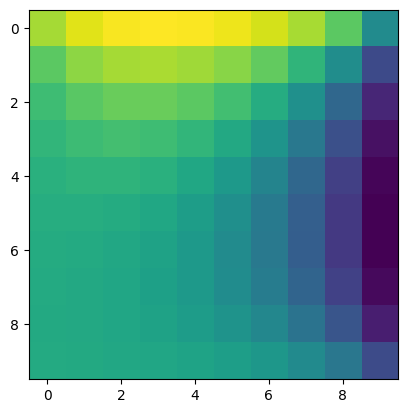

100 60 60 30


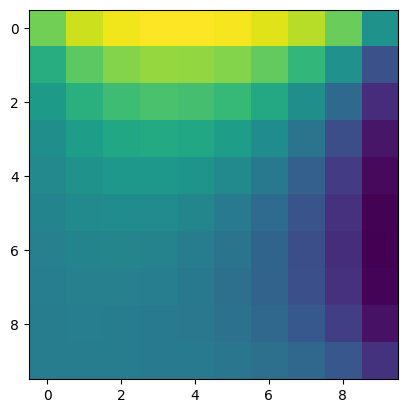

100 60 60 60


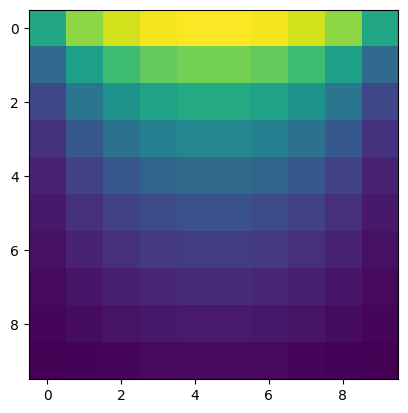

100 60 60 100


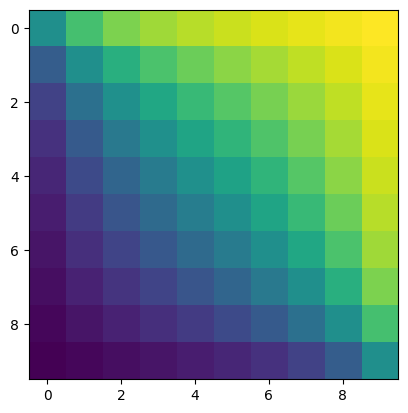

100 60 100 0


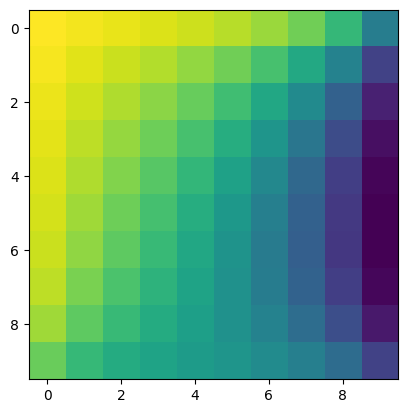

100 60 100 30


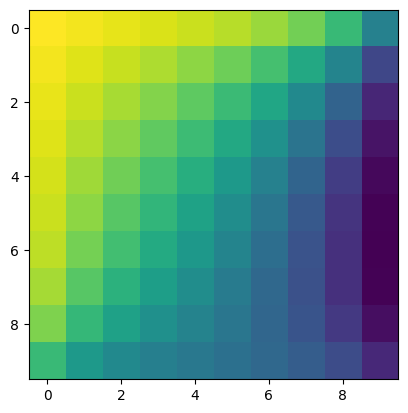

100 60 100 60


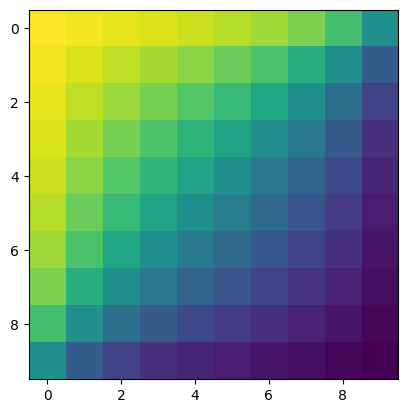

100 60 100 100


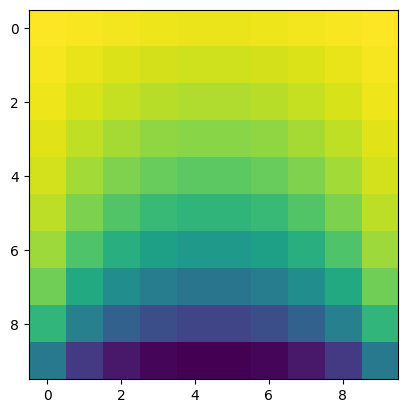

100 100 0 0


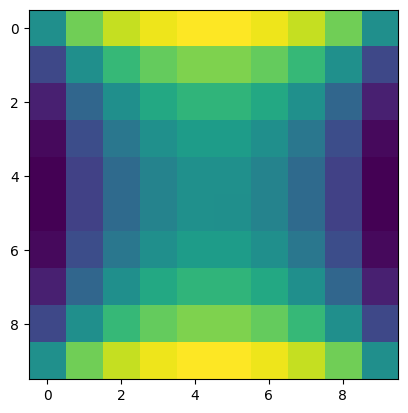

100 100 0 30


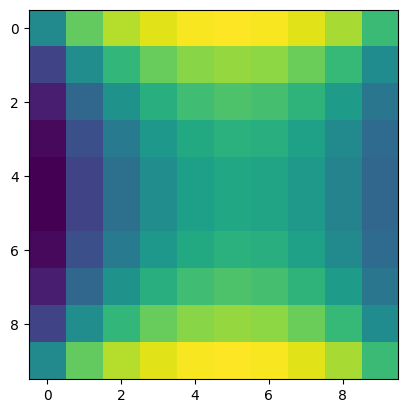

100 100 0 60


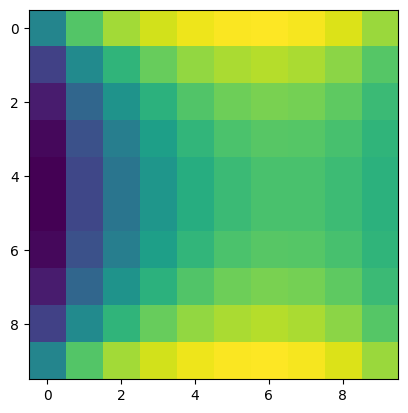

100 100 0 100


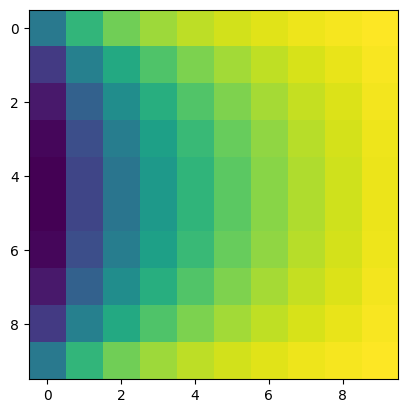

100 100 30 0


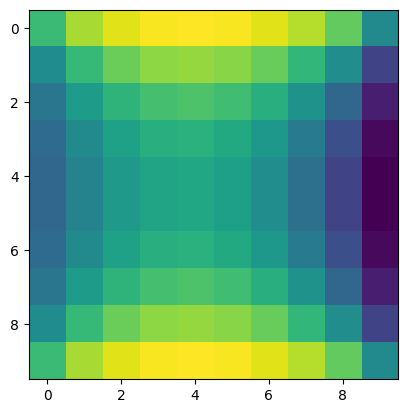

100 100 30 30


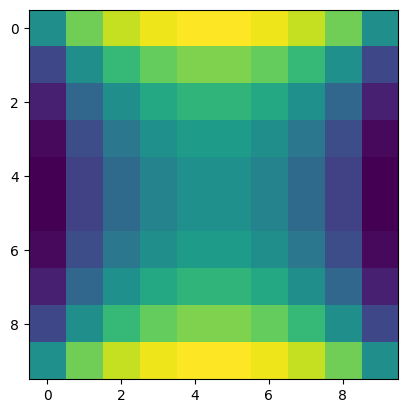

100 100 30 60


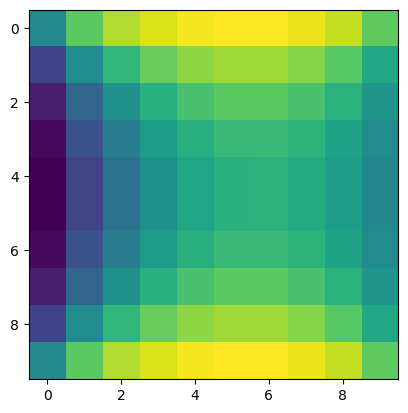

100 100 30 100


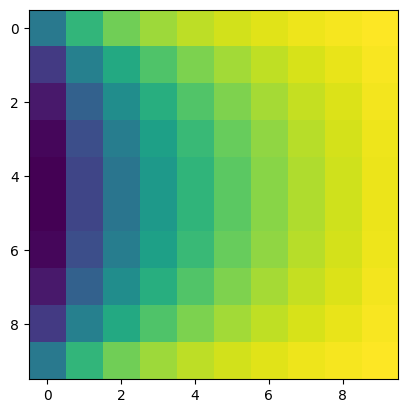

100 100 60 0


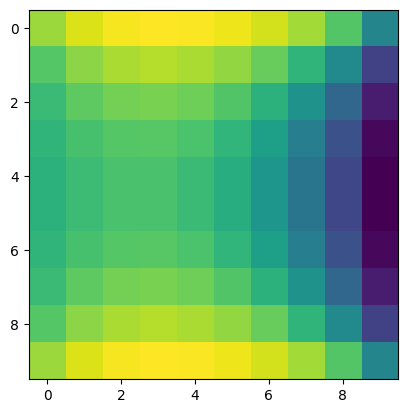

100 100 60 30


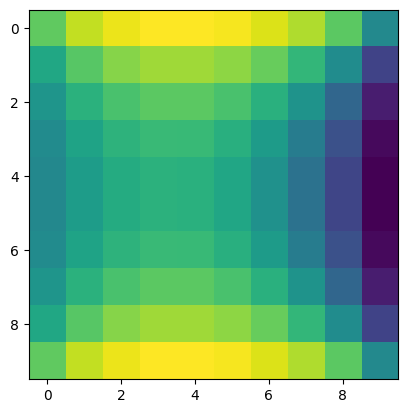

100 100 60 60


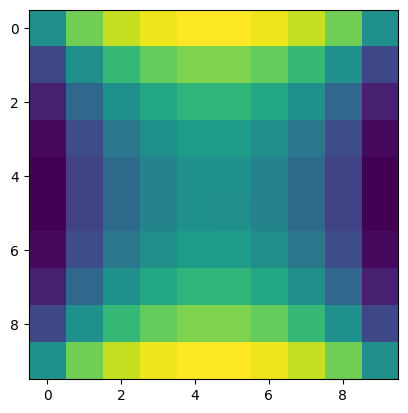

100 100 60 100


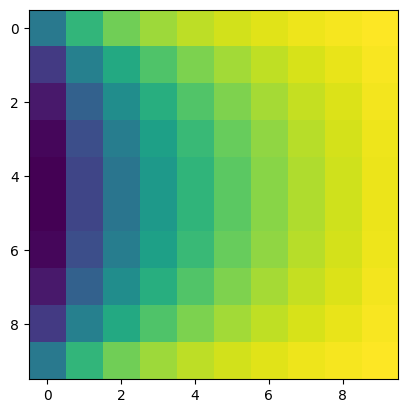

100 100 100 0


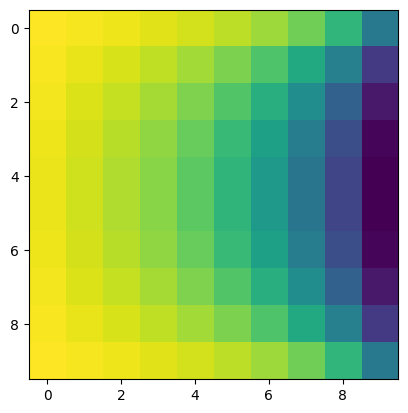

100 100 100 30


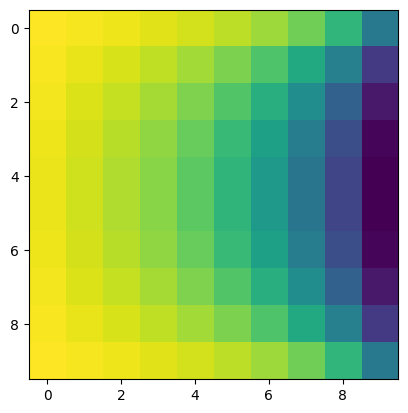

100 100 100 60


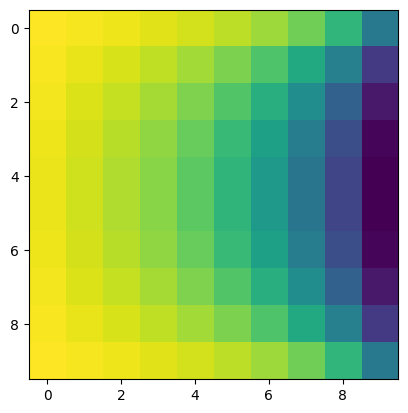

100 100 100 100


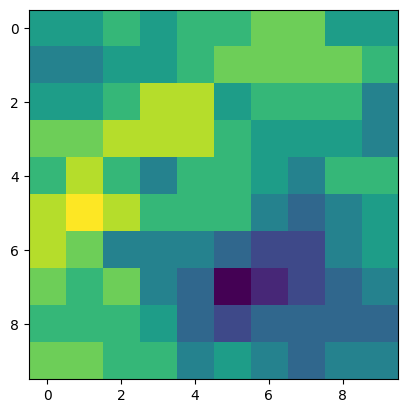

In [ ]:
temps = [0,30,60,100]

A = gen_temp_matrix(10)
L, U = lu_factorization(A)

for top in temps:
  for bottom in temps:
    for left in temps:
      for right in temps:
        print(top,bottom,left,right)
        b = gen_b(10,top,bottom,left,right)
        x = lu_solve(L,U,b)
        X = np.reshape(x,(10,10))
        plt.imshow(X,interpolation='nearest')
        plt.show()

Below represents code fot the timing and iterations for the jacobi, SOR, Gauss-Seidel methods

In [ ]:
import time

def jacobi(A, b, x0, tol=1e-6, max_iter=100):
  n = len(b)
  x = x0.copy()
  it = 0
  for _ in range(max_iter):
    it += 1
    x_new = np.zeros(n)
    for i in range(n):
      sum_ax = sum(A[i, j] * x[j] for j in range(n) if j != i)
      x_new[i] = (b[i] - sum_ax) / A[i, i]
    if np.linalg.norm(x_new - x, np.inf) < tol:
      return x_new, it
    x = x_new
  raise ValueError("Max iterations reached without convergence.")

def gauss_seidel(A, b, x0, tol=1e-6, max_iter=100):
  n = len(b)
  x = x0.copy()
  it=0
  for _ in range(max_iter):
    it += 1
    x_new = x.copy()
    for i in range(n):
      sum_ax_lower = sum(A[i, j] * x_new[j] for j in range(i))
      sum_ax_upper = sum(A[i, j] * x[j] for j in range(i + 1, n))
      x_new[i] = (b[i] - sum_ax_lower - sum_ax_upper) / A[i, i]
    if np.linalg.norm(x_new - x, np.inf) < tol:
      return x_new, it
    x = x_new
  raise ValueError("Max iterations reached without convergence.")

#AI was used, since my code for the sor was not working.

def sor(A, b, x0, omega=0.1, tol=1e-6, max_iter=10000):
    n = len(b)
    x = x0.copy()
    for iteration in range(max_iter):
        x_old = x.copy()
        for i in range(n):
            sigma = np.dot(A[i, :i], x[:i]) + np.dot(A[i, i+1:], x_old[i+1:])
            x[i] = (1 - omega) * x_old[i] + (omega / A[i, i]) * (b[i] - sigma)
        if np.linalg.norm(x - x_old, ord=np.inf) < tol:
            return x, iteration + 1
    return x, max_iter  # Did not converge

'''def sor(A, b, x0, omega=1.0, tol=1e-6, max_iter=100):
  n = len(b)
  x = x0.copy()
  it = 0
  for _ in range(max_iter):
    it += 1
    x_new = x.copy()
    for i in range(n):
      sum_ax_lower = sum(A[i, j] * x_new[j] for j in range(i))
      sum_ax_upper = sum(A[i, j] * x[j] for j in range(i + 1, n))
    if np.linalg.norm(x_new - x, np.inf) < tol:
      return x_new, it
    x = x_new
  raise ValueError("Max iterations reached without convergence.")'''

n = 3
A = gen_temp_matrix(n)
b = gen_b(n,100,0,20,80)
x0 = np.zeros(n*n)

'''
start_time = time.perf_counter()
L, U = lu_factorization(A)
x = lu_solve(L, U, b)
total_LU_time = time.perf_counter() - start_time
'''

start_time = time.perf_counter()
x_jacobi, it_jac = jacobi(A, b, x0)
jacobi_time = time.perf_counter() - start_time

start_time = time.perf_counter()
x_gs, it_gs = gauss_seidel(A, b, x0)
gs_time = time.perf_counter() - start_time

start_time = time.perf_counter()
x_sor, it_sor = sor(A, b, x0)
sor_time = time.perf_counter() - start_time

print('Jacobi time',jacobi_time)
print('Iterations:', it_jac)
print('GS time',gs_time)
print('Iterations:', it_gs)
print('sor time',sor_time)
print('Iterations:', it_sor)

Jacobi time 0.003280519999975695
Iterations: 50
GS time 0.001756430000000364
Iterations: 27
sor time 0.022364168999956746
Iterations: 475


Section 2:

Computing Omega

The code below was provided by Owen. It attempts to find the best omega, which minimizes the error. Here, we use the infinity norm to define the distance among the errors.

In [ ]:
def getOptimalOmega(A, b, x0):
  x0 = np.linalg.solve(A,b)
  os = np.linspace(0,2,201)
  best_e = (100,-1)
  for o in os:
    x1, _ = sor(A, b, x0, omega=o)
    e = np.max(np.abs(x1-x0))
    if e < best_e[0]:
      best_e = (e, o)
  return best_e

n = 3
A = gen_temp_matrix(n)
b = gen_b(n,100,0,20,80)
x0 = np.zeros(n*n)

def getOptimalOmega(A, b, x0):
    os = np.linspace(0.01, 1.99, 200)  # avoid omega=0 or omega=2
    best_e = (np.inf, -1)

    for omega in os:
        x1, _ = sor(A, b, x0.copy(), omega=omega)  # make sure x0 isn't modified
        e = np.linalg.norm(x1 - x0, ord=np.inf)  # could also use 2-norm
        if e < best_e[0]:
            best_e = (e, omega)

    return best_e


print(getOptimalOmega(A, b, x0))


(np.float64(78.57125912405013), np.float64(0.01))


Next, we graph the errors with their corresponding omega term. This code was motified by AI. Notice that the errors appear very close to 0. That is, there is no clear optimum from looking at the graph.

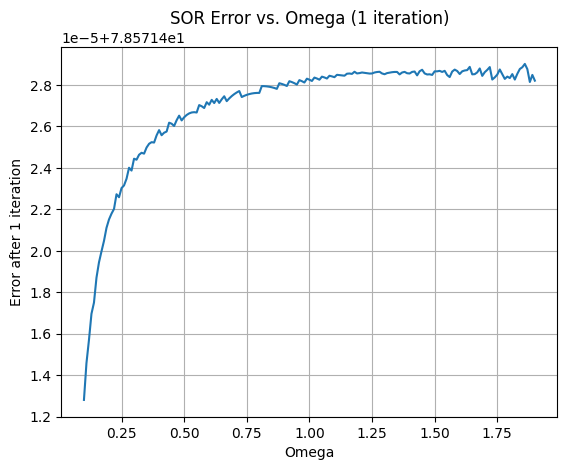

None


In [ ]:
import matplotlib.pyplot as plt

def plotOmegaConvergence(A, b, x0):
    os = np.linspace(0.1, 1.9, 181)
    errors = []

    for omega in os:
        x = x0.copy()
        x_new, _ = sor(A, b, x, omega=omega)
        e = np.max(np.abs(x_new - x))
        errors.append(e)

    plt.plot(os, errors)
    plt.xlabel('Omega')
    plt.ylabel('Error after 1 iteration')
    plt.title('SOR Error vs. Omega (1 iteration)')
    plt.grid(True)
    plt.show()


n = 3
A = gen_temp_matrix(n)
b = gen_b(n,100,0,20,80)
x0 = np.zeros(n*n)

w=getOptimalOmega(A, b, x0)

print(plotOmegaConvergence(A, b, x0))


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy.linalg import lu_factor, lu_solve

def directSolveAndPlot(A, b, n):
    # Start timing
    start = time.perf_counter()

    # LU decomposition and solve
    lu, piv = lu_factor(A)
    x = lu_solve((lu, piv), b)

    # End timing
    end = time.perf_counter()
    elapsed = end - start

    # Reshape solution into n x n grid
    x_grid = x.reshape((n, n))

    # Plot heatmap
    plt.imshow(x_grid, cmap='hot', interpolation='nearest')
    plt.title("Direct Solve Heatmap (n = {})".format(n))
    plt.colorbar(label='Solution value')
    plt.show()

    print(f"Wall-clock time: {elapsed:.6f} seconds")
    return x, elapsed


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#AI was used to generate this code

def findOptimalOmegaSOR(A, b):
    x_star = np.linalg.solve(A, b)  # exact solution
    x0 = np.zeros_like(b)

    omegas = np.linspace(0.1, 1.9, 181)
    errors = []
    best_error = np.inf
    best_omega = None

    for omega in omegas:
        x_omega, _ = sor(A, b, x0.copy(), omega)
        err = np.linalg.norm(x_omega - x_star, ord=np.inf)
        errors.append(err)

        if err < best_error:
            best_error = err
            best_omega = omega

    # Plot error vs omega
    plt.plot(omegas, errors)
    plt.xlabel("ω (relaxation parameter)")
    plt.ylabel(r"$\|x^{(\omega)} - x^*\|_\infty$")
    plt.title("Infinity-norm Error vs. ω (SOR method)")
    plt.grid(True)
    plt.axvline(best_omega, color='r', linestyle='--', label=f'ω_opt ≈ {best_omega:.3f}')
    plt.legend()
    plt.show()

    return best_omega


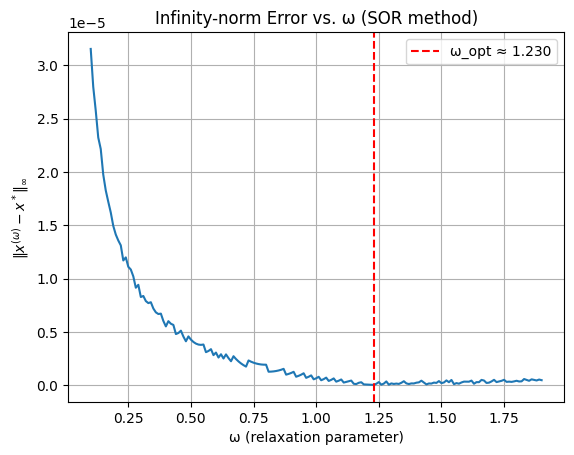

Optimal omega (ω_opt): 1.2300


In [ ]:
n = 3
A = gen_temp_matrix(n)
b = gen_b(n, 100, 0, 20, 80)

omega_opt = findOptimalOmegaSOR(A, b)
print(f"Optimal omega (ω_opt): {omega_opt:.4f}")


Section 3

Instead of repeating the codes in section one. We will replicate the SOR code, and use the optimum omega

In [ ]:
import time

time_start = time.perf_counter()
x_new, it = sor(A,b,x0,omega_opt)
time_end = time.perf_counter()
time = time_end - time_start
print("Time: ", time)
print("New Solution: ", x_new)
print("Iterations: ", it)

Time:  0.0018757499997263949
New Solution:  [57.14285713 71.4285714  78.57142856 37.14285713 49.99999997 62.85714284
 21.42857143 28.57142855 42.85714285]
Iterations:  15


Section 4

Below is my code that I created to generate the time for the methods, and comparing the results below. I noticed that there is not a consistent ranking among the methods, so I decided to find a code that ranks the methods depending on the time.

In [ ]:
import time

#Time for SOR
time_start_1 = time.perf_counter()
x_new, it = sor(A,b,x0,omega_opt)
time_end_1 = time.perf_counter()
elapsed_time = time_end_1 - time_start_1
print("Time (SOR): ", elapsed_time)

#Time for direct method
time_start_2 = time.perf_counter()
lu, piv = lu_factor(A)
x = lu_solve((lu, piv), b)
time_end_2 = time.perf_counter()
elapsed_time = time_end_2 - time_start_2
print("Time (Direct Method): ", elapsed_time)

#Time for gauss-seidel method
time_start_3 = time.perf_counter()
x_new, it = gauss_seidel(A, b, x0)
time_end_3 = time.perf_counter()
elapsed_time = time_end_3 - time_start_3
print("Time (Gauss-Seidel): ", elapsed_time)

#Time for jacobi method
time_start_4 = time.perf_counter()
x_new, it = jacobi(A, b, x0)
time_end_4 = time.perf_counter()
elapsed_time = time_end_4 - time_start_4
print("Time (Jacobi): ", elapsed_time)

Time (SOR):  0.001862520000031509
Time (Direct Method):  0.0006000099997436337
Time (Gauss-Seidel):  0.0021577600000455277
Time (Jacobi):  0.0017963899999813293


This code below was generated mostly through AI. It creates a code that ranks the methods depending on the time, since the time is different for each run. I will note that the direct method is typically considered faster than the indirect methods. However, this may not be true for larger matrices. We will consider that next.

In [ ]:
import time
import numpy as np
from scipy.linalg import lu_factor, lu_solve

# Assume A, b, x0, omega_opt are already defined
timings = {}

# --- SOR Method ---
time_start = time.perf_counter()
x_sor, it_sor = sor(A, b, x0, omega_opt)
time_end = time.perf_counter()
timings["SOR"] = time_end - time_start

# --- Direct Method (LU) ---
time_start = time.perf_counter()
lu, piv = lu_factor(A)
x_direct = lu_solve((lu, piv), b)
time_end = time.perf_counter()
timings["Direct (LU)"] = time_end - time_start

# --- Gauss-Seidel Method ---
time_start = time.perf_counter()
x_gs, it_gs = gauss_seidel(A, b, x0)
time_end = time.perf_counter()
timings["Gauss-Seidel"] = time_end - time_start

# --- Jacobi Method ---
time_start = time.perf_counter()
x_jacobi, it_jacobi = jacobi(A, b, x0)
time_end = time.perf_counter()
timings["Jacobi"] = time_end - time_start

# --- Sort and print results ---
print("Method Runtime Rankings (fastest to slowest):")
ranked = sorted(timings.items(), key=lambda x: x[1])  # Sort by runtime
for method, t in ranked:
    print(f"{method:15s}: {t:.6f} seconds")


Method Runtime Rankings (fastest to slowest):
Direct (LU)    : 0.000297 seconds
Gauss-Seidel   : 0.001735 seconds
Jacobi         : 0.001771 seconds
SOR            : 0.001917 seconds


Below we decide to increase the dimension of the matrix. Originally, we had a dimension of $n=3$, but we changed it to $n=10$. The code below sets up a new framework for the changed dimensions

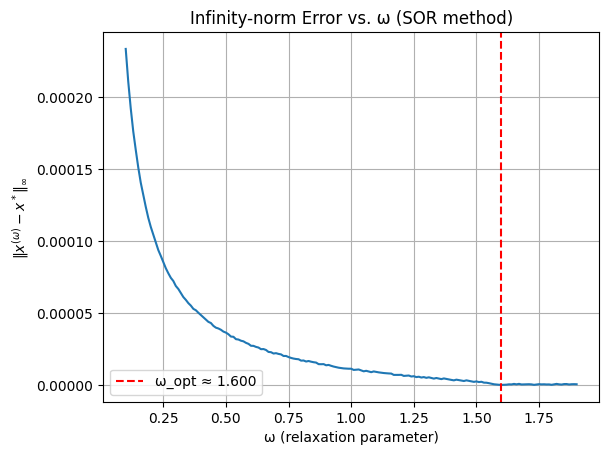

Optimal omega (ω_opt): 1.6000


In [ ]:
n = 10
A = gen_temp_matrix(n)
b = gen_b(n, 100, 0, 20, 80)
omega_opt = findOptimalOmegaSOR(A, b)
print(f"Optimal omega (ω_opt): {omega_opt:.4f}")

This code is practically copied from the one when $n=3$. However, I would note that we had to change the maximum interations. In the $n=3$ case, the interations was smaller, since we did not need as much interations to find a solution. For $n=10$, the matrix is more complex, so there is a higher need to increase the number of maximum interations.

In [ ]:
# Assume A, b, x0, omega_opt are already defined
timings = {}

# Re-initialize x0 with the correct size
x0 = np.zeros(n*n)

# --- SOR Method ---
time_start = time.perf_counter()
x_sor, it_sor = sor(A, b, x0, omega_opt, max_iter=1000) # Increased max_iter
time_end = time.perf_counter()
timings["SOR"] = time_end - time_start

# --- Direct Method (LU) ---
time_start = time.perf_counter()
lu, piv = lu_factor(A)
x_direct = lu_solve((lu, piv), b)
time_end = time.perf_counter()
timings["Direct (LU)"] = time_end - time_start

# --- Gauss-Seidel Method ---
time_start = time.perf_counter()
x_gs, it_gs = gauss_seidel(A, b, x0, max_iter=1000) # Increased max_iter
time_end = time.perf_counter()
timings["Gauss-Seidel"] = time_end - time_start

# --- Jacobi Method ---
time_start = time.perf_counter()
x_jacobi, it_jacobi = jacobi(A, b, x0, max_iter=1000) # Increased max_iter
time_end = time.perf_counter()
timings["Jacobi"] = time_end - time_start

# --- Sort and print results ---
print("Method Runtime Rankings (fastest to slowest):")
ranked = sorted(timings.items(), key=lambda x: x[1])  # Sort by runtime
for method, t in ranked:
    print(f"{method:15s}: {t:.6f} seconds")

Method Runtime Rankings (fastest to slowest):
Direct (LU)    : 0.000305 seconds
SOR            : 0.016205 seconds
Gauss-Seidel   : 0.596929 seconds
Jacobi         : 1.185612 seconds
